# Funciones hash

### Método de división

$$ h(x) = |x| \text{mod} M $$

Es muy recomendable utilizar un número primo para $M$.

In [1]:
def division(x=0, M=97):
    return abs(x) % M

print(division(30501))
print(division(30502))
print(division(-30501))
for i in range(10):
    print(i, '=>', division(i))

43
44
43
0 => 0
1 => 1
2 => 2
3 => 3
4 => 4
5 => 5
6 => 6
7 => 7
8 => 8
9 => 9


### Método de la mitad del cuadrado

$$ h(x) = \frac{W}{M}x^2 \text{mod} W $$

Con $W$ igual al tamaño de la palabra de la máquina, por ejemplo, $W=2^{32}$.

In [2]:
def mitad_cuadrado(x=0, k=10, w=32):
    mask = (1 << k) - 1
    return ((x**2) >> (w-k)) & mask

print(mitad_cuadrado(30501))
print(mitad_cuadrado(30502))
print(mitad_cuadrado(-30501))
for i in range(10):
    print(i, '=>', mitad_cuadrado(i))

221
221
221
0 => 0
1 => 0
2 => 0
3 => 0
4 => 0
5 => 0
6 => 0
7 => 0
8 => 0
9 => 0


### Método de Fibonacci

$$ F_{n+2} = F_{n+1} + F_n \qquad \Rightarrow \qquad F_{n+2} - F_{n+1} - F_{n} = 0$$

$$ \qquad \qquad \qquad \quad \Rightarrow \qquad \phi^2-\phi-1=0$$

$$ \qquad \qquad \qquad \Rightarrow \quad \phi_{1,2} = \frac{1 \pm 5}{2}$$

El $n$-ésimo número de Fibanacci es de la forma:

$$ f_n = \frac{1}{\sqrt{5}}(\phi^n_1 - \phi^n_2)$$

In [3]:
from math import sqrt
((1+sqrt(5))/2)**2

2.618033988749895

In [4]:
(1-sqrt(5))/2

-0.6180339887498949

In [5]:
def fibonacci(x=0, k=10, w=32, a=2654435769):
    mask = (1 << k) - 1
    return ((x * a) >> (w-k)) & mask

print(fibonacci(30501))
print(fibonacci(30502))
print(fibonacci(-30501))
for i in range(10):
    print(i, '=>', fibonacci(i))

670
279
353
0 => 0
1 => 632
2 => 241
3 => 874
4 => 483
5 => 92
6 => 725
7 => 334
8 => 966
9 => 575


# Manipulando datos faltantes

In [6]:
import pandas as pd
from io import StringIO

In [7]:
datos = \
"""A,B,C,D
1.0,2.1,3.7,
5.9,6.2,,8.6
9.3,0.4,1.8"""
df = pd.read_csv(StringIO(datos))
df

,A,B,C,D
0,1.0,2.1,3.7,NaN
1,5.9,6.2,NaN,8.6
2,9.3,0.4,1.8,NaN


In [8]:
df.isnull().sum()

A    0
B    0
C    1
D    2
dtype: int64

### Eliminando valores faltantes

Una de las maneras más simples de manipular los valores faltantes es eliminar características (columnas, features) o muestras (filas) que contengan valores faltantes.

In [9]:
df.dropna(axis=1) # Por columna

,A,B
0,1.0,2.1
1,5.9,6.2
2,9.3,0.4


In [10]:
df.dropna(axis=0) # Por fila

,A,B,C,D


In [11]:
df.dropna(how='all') # Elimina las muestras en las que todas sus columnas son NaN

,A,B,C,D
0,1.0,2.1,3.7,NaN
1,5.9,6.2,NaN,8.6
2,9.3,0.4,1.8,NaN


In [12]:
df.dropna(thresh=4) # Elimina las muestras que tengan menos de 4 valores no NaN

,A,B,C,D


In [13]:
df.dropna(subset=['C']) # Elimina las muestras que tengan NaN en la columna C

,A,B,C,D
0,1.0,2.1,3.7,NaN
2,9.3,0.4,1.8,NaN


In [14]:
df.dropna(subset=['A','C'])

,A,B,C,D
0,1.0,2.1,3.7,NaN
2,9.3,0.4,1.8,NaN


### Sustitución de valores faltantes

En ocasiones no es recomendable eliminar características o muestras completas debido a que se podrían perder datos valiosos en el proceso; en este caso se pueden utilizar técnicas de interpolación para estimar los valores faltantes a partir de otras muestras en nuestro conjunto de datos. Una usada comúnmente es la media por características (columnas).

Sustituye valores faltantes con la media

In [15]:
import numpy as np

In [16]:
datos_n = df.copy() # No afectar al df original
for col in df.columns.values :
    falta = np.sum(df[col].isnull())
    if falta:
        print ('Asignando {} valores en columna : {} '.format(falta,col))
        mean = df[col].mean()
datos_n[col] = df[col].fillna(mean)

Asignando 1 valores en columna : C 
Asignando 2 valores en columna : D 


Se puede utilizar la clase *SimpleImputer* para sustituir datos faltantes:

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.values)
datos_n = imp.transform(df.values)
datos_n

array([[1.  , 2.1 , 3.7 , 8.6 ],
       [5.9 , 6.2 , 2.75, 8.6 ],
       [9.3 , 0.4 , 1.8 , 8.6 ]])

Otras opciones para el parámetro *strategy* son *median* y *most_frequent*, este último coloca el
valor más repetido en lugar de los faltantes y es muy útil cuando se tienen datos categóricos:

In [19]:
df = pd.DataFrame([['a', np.nan],
                  ['b', 'y'],
                  ['c', 'x'],
                  ['a', 'y'],
                  [np.nan, 'z']], dtype='category')

imp = SimpleImputer(strategy='most_frequent')
imp.fit_transform(df)

array([['a', 'y'],
       ['b', 'y'],
       ['c', 'x'],
       ['a', 'y'],
       ['a', 'z']], dtype=object)

### Manipulando datos categóricos

Comúnmente los conjuntos de datos contienen datos categóricos. Es importante distinguir entre datos categóricos ordinales y nominales; los ordinales son aquellos que pueden ser ordenados (p.e., en la talla de una prenda M < G < XG); en los nominales no tiene mucho sentido pensar en un orden (p.e., en el color de una prenda).

#### Datos ordinales

In [20]:
df = pd.DataFrame([
    ['verde', 'M', 10.3, 'clase1'],
    ['rojo', 'G', 14.2, 'clase2'],
    ['azul', 'XG', 15.6, 'clase1'],
])

df.columns = ['color', 'talla', 'precio', 'clase']
df

,color,talla,precio,clase
0,verde,M,10.3,clase1
1,rojo,G,14.2,clase2
2,azul,XG,15.6,clase1


Este conjunto de datos contiene una característica nominal (color) una ordinal (talla) y una numérica (precio). Este conjunto puede utilizarse en un algoritmo supervisado, dado que las
etiquetas de la clase a la que pertenece cada muestra en la última columna.

### Mapeando valores ordinales

In [21]:
talla_map = {et: ind for ind, et in enumerate(np.unique(df.talla))} 
# No sirve por el orden de las tallas M < G < XG
talla_map

{'G': 0, 'M': 1, 'XG': 2}

Para garantizar que nuestros algoritmos interpretan correctamente características ordinales, es necesario convertir estas características en valores enteros; desafortunadamente no hay una
función que pueda determinar automáticamente el orden correcto a partir de las etiquetas de la talla; por lo tanto, en general se debe realizar este proceso manualmente (con ayuda de un
diccionario):

In [22]:
talla_map = {'M': 0, 'G': 1, 'XG': 2}
df['talla'] = df['talla'].map(talla_map) #['talla'] es equivalente a .talla
df

,color,talla,precio,clase
0,verde,0,10.3,clase1
1,rojo,1,14.2,clase2
2,azul,2,15.6,clase1


#### Codificando las etiquetas de clase

Muchas algoritmos de aprendizaje requieren que las etiquetas de clase esten codificadas como números enteros. Aunque la mayoría de los algoritmos que provee scikit-learn pueden realizar
esta conversión internamente, es una buena práctica proveer las etiquetas como enteros y como las clases no son ordinales no importa qué número se asigna a cada una de ellas. Por lo tanto,
podemos enumerar las etiquetas de clase comenzando con 0:

In [23]:
clase_map = {et: ind for ind, et in enumerate(np.unique(df['clase']))}
clase_map

{'clase1': 0, 'clase2': 1}

A continuación podemos usar el diccionario para realizar la conversión de las etiquetas de
clase a enteros:


In [24]:
df.clase = df.clase.map(clase_map)
df

,color,talla,precio,clase
0,verde,0,10.3,0
1,rojo,1,14.2,1
2,azul,2,15.6,0


#### Codificando valores nominales en formato one-hot

Podemos realizar un proceso similar para la columna color (dado que no se requiere orden).

In [25]:
color_map = {et: ind for ind, et in enumerate(np.unique(df.color))}
# No sirve porque no hay un orden en los colores
color_map

{'azul': 0, 'rojo': 1, 'verde': 2}

Si nos detuviéramos en este punto, estaríamos cayendo en uno de los errores más comúnes
cuando se utilizan datos categóricos: los colores no tienen un orden particular; sin embargo un
algoritmo de aprendizaje supondría que verde es mayor que rojo y que rojo es mayor que azul.
Esta suposición no es correcta y aunque se podría obtener un buen resultado, en general puede
no ser óptimo.

Una posible solución es utilizar la técnica conocida como codificación one-hot. La idea
básica es crear una nueva característica ficticia (dummy) por cada valor único de la columna
nominal correspondiente. En este caso, se generarán tres columnas: azul, rojo y verde. Se utilizan
valores binarios para indicar el color particular de cada muestra.
Para realizar esta transformación se puede utilizar el OneHotEncoder disponible en el módulo
preprocessing de sci-kitlearn:

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['color']])
ohe.transform(df[['color']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Una forma más conveniente para crear esas características ficticias para la codificación onehot, es utilizar el método get_dummies implementado en pandas. Si se aplica a un DataFrame,
este método convertirá solamente las columnas de tipo string y dejará las otras columnas sin
cambios 

In [27]:
# Con pandas (Recomendado)
pd.get_dummies(df['color'])

,azul,rojo,verde
0,False,False,True
1,False,True,False
2,True,False,False


In [28]:
pd.get_dummies(df[['precio', 'color', 'talla']])

,precio,talla,color_azul,color_rojo,color_verde
0,10.3,0,False,False,True
1,14.2,1,False,True,False
2,15.6,2,True,False,False


In [29]:
pd.get_dummies(df['color'], drop_first=True)

,rojo,verde
0,False,True
1,True,False
2,False,False


### Escalamiento de características

Este es otro paso clave en el preprocesamiento de datos; muchos algoritmos de aprendizaje y
optimización tienen mejor comportamiento si las características discriminantes se encuentran en
la misma escala.

Existen dos enfoques comunes para escalar características:

***Normalización***, se se refiere al reescalamiento de cada característica en el intervalo [0, 1].
Para esto, se aplica el escalamiento min-max en cada columna:

$$ x^{(i)}_{norm} = \frac{x^{(i)}-x_{min}}{x_{max}-x_{min}} $$

Donde $x^{(i)}$ es una muestra particular, $x_{min}$ es el valor mínimo de la columna y $x_{max}$ el máximo.

***Estandarización***, este prepocesamiento puede resultar más práctico para algoritmos de
optimización (p.e. gradient descent), esto se debe a que muchos modelos inicializan sus
pesos a valores cercanos a 0. Utilizando estandarización, se centran las columnas de características a media 0 con desviación estándar 1. Además, la estandarización mantiene
información útil sobre secciones aisladas y hace que los algoritmos sean menos sensibles a
ellas en contraste al escalamiento min-max. El procedimiento de estandarización se realiza con:

$$ x^{(i)}_{std} = \frac{x^{i}-\mu_x}{\sigma_x} $$

donde $\mu_x$ es la media muestral de una columna particular y $\sigma_x$ es su correspondiente dessviación estándar.

Otro enfoque menos usado se conoce como Normalizer :
***Normalizer***, escala las muestras individuales a vectores unitarios; es decir, cada muestra
(renglón de la matriz de datos) con al menos un compnente difrente de cero se reescala
independientemente de las otras muestras de forma que su norma sea cero.:

$$ x^{(i)}_{nz} = \frac{x^{(i)}}{||x||} $$

donde $||x||$ es la norma de la muestra (renglón de la matriz).

In [30]:
x = np.array([0,1,2,3,4,5,6])
print('Normalizado  :', (x - x.min()) / (x.max() - x.min()))
print('Estandarizado:', (x - x.mean()) / x.std())
print('Normalizer   :', x / np.linalg.norm(x))

Normalizado  : [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
Estandarizado: [-1.5 -1.  -0.5  0.   0.5  1.   1.5]
Normalizer   : [0.         0.10482848 0.20965697 0.31448545 0.41931393 0.52414242
 0.6289709 ]


In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 

In [32]:
iris = datasets.load_iris()
# sepal length, petal length
X = iris.data[:, [2, 3]]
# target : 0, 1, 2 (setosa, versicolor, virginica)
y = iris.target[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train) # datos de entrenamiento
X_test_norm = mms.transform(X_test) # datos de prueba
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_train_std = stds.fit_transform(X_train) # datos de entrenamiento
X_test_std = stds.transform(X_test) # datos de prueba
from sklearn.preprocessing import Normalizer
nz = Normalizer()
X_train_nz = nz.fit_transform(X_train) # datos de entrenamiento
X_test_nz = nz.transform(X_test) # datos de prueba

### Detección de anomalías

Detectar anomalías es muy útil cuando se está realizando el preprocesamiento de datos: puede
ayudar a evitar sesgos no deseados 

#### Normalidad de la distribución

Para verificar la normalidad de una variable aleatoria es posible utilizar alguna de las siguientes
técnicas:

- Realizar un histograma y ver si parece normal
- Hacer una gráfica *Quantile-Quantile Normal*
- Realizar un contraste de normalidad *Shapiro-Wilks*
- Hacer un diagrama de dispersión por pares de variables (*PairPlot*)

In [34]:
# Conjunto de datos ficticio con distribución normal
data = np.random.randn(50000) * 20 + 20

### Histograma

In [35]:
import matplotlib.pyplot as plt

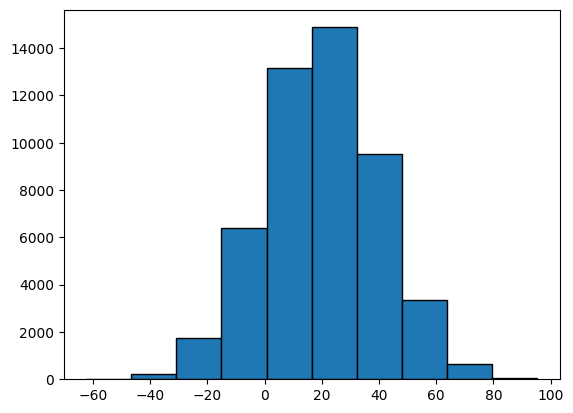

In [36]:
plt.hist(data, edgecolor='black')
plt.show()

#### Gráfica de cuantiles

In [37]:
import pylab
import scipy.stats as stats

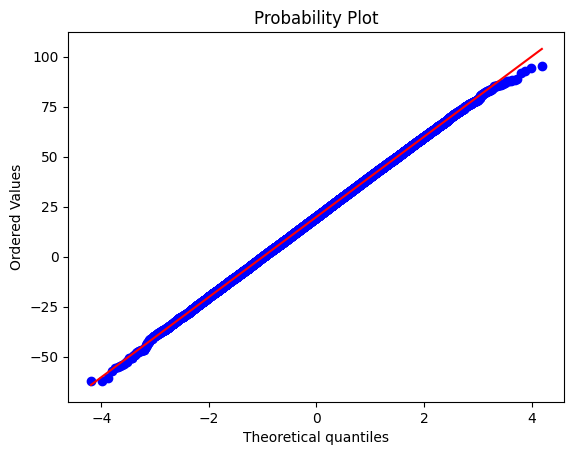

In [38]:
stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

#### Prueba de Shapiro

In [39]:
_, p_value = stats.shapiro(data)
print('p_value = ', p_value)
# p_value > 0.05 => La distribución es normal

p_value =  0.4855639369804719


C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


### Prueba de normalidad

In [40]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


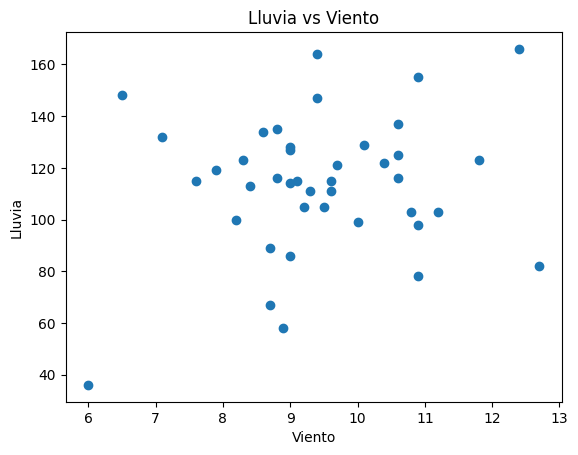

In [41]:
plt.scatter(cont.Velocidad_viento, cont.Dias_Lluvia)
plt.title('Lluvia vs Viento')
plt.xlabel('Viento')
plt.ylabel('Lluvia')
plt.show()

No parece mostrar evidencia de correlación lineal.

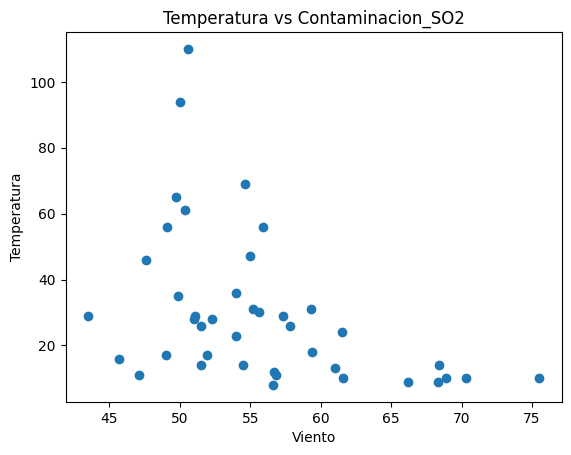

In [42]:
plt.scatter(cont.Temperatura, cont.Contaminacion_SO2)
plt.title('Temperatura vs Contaminacion_SO2')
plt.xlabel('Viento')
plt.ylabel('Temperatura')
plt.show()


Parece existir correlación.

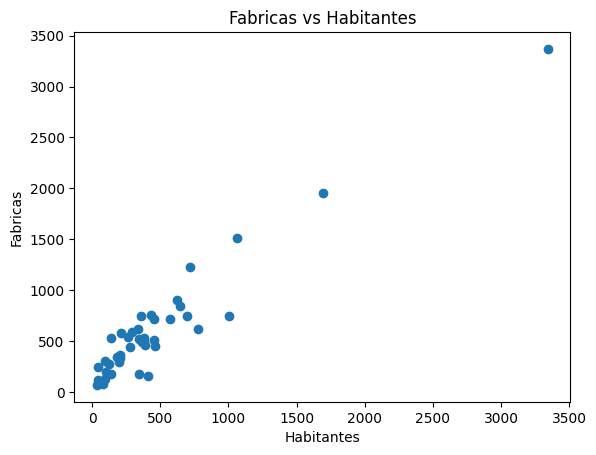

In [43]:
plt.scatter(cont.Fabricas, cont.Habitantes) # tiene outliers
plt.title('Fabricas vs Habitantes')
plt.xlabel('Habitantes')
plt.ylabel('Fabricas')
plt.show()

Sin lugar a dudas existe correlación entre este par de variables, y contiene valores atípicos.
Para ver todas las variables juntos, podemos realizar una diagrama de dispersión por pares
de variables

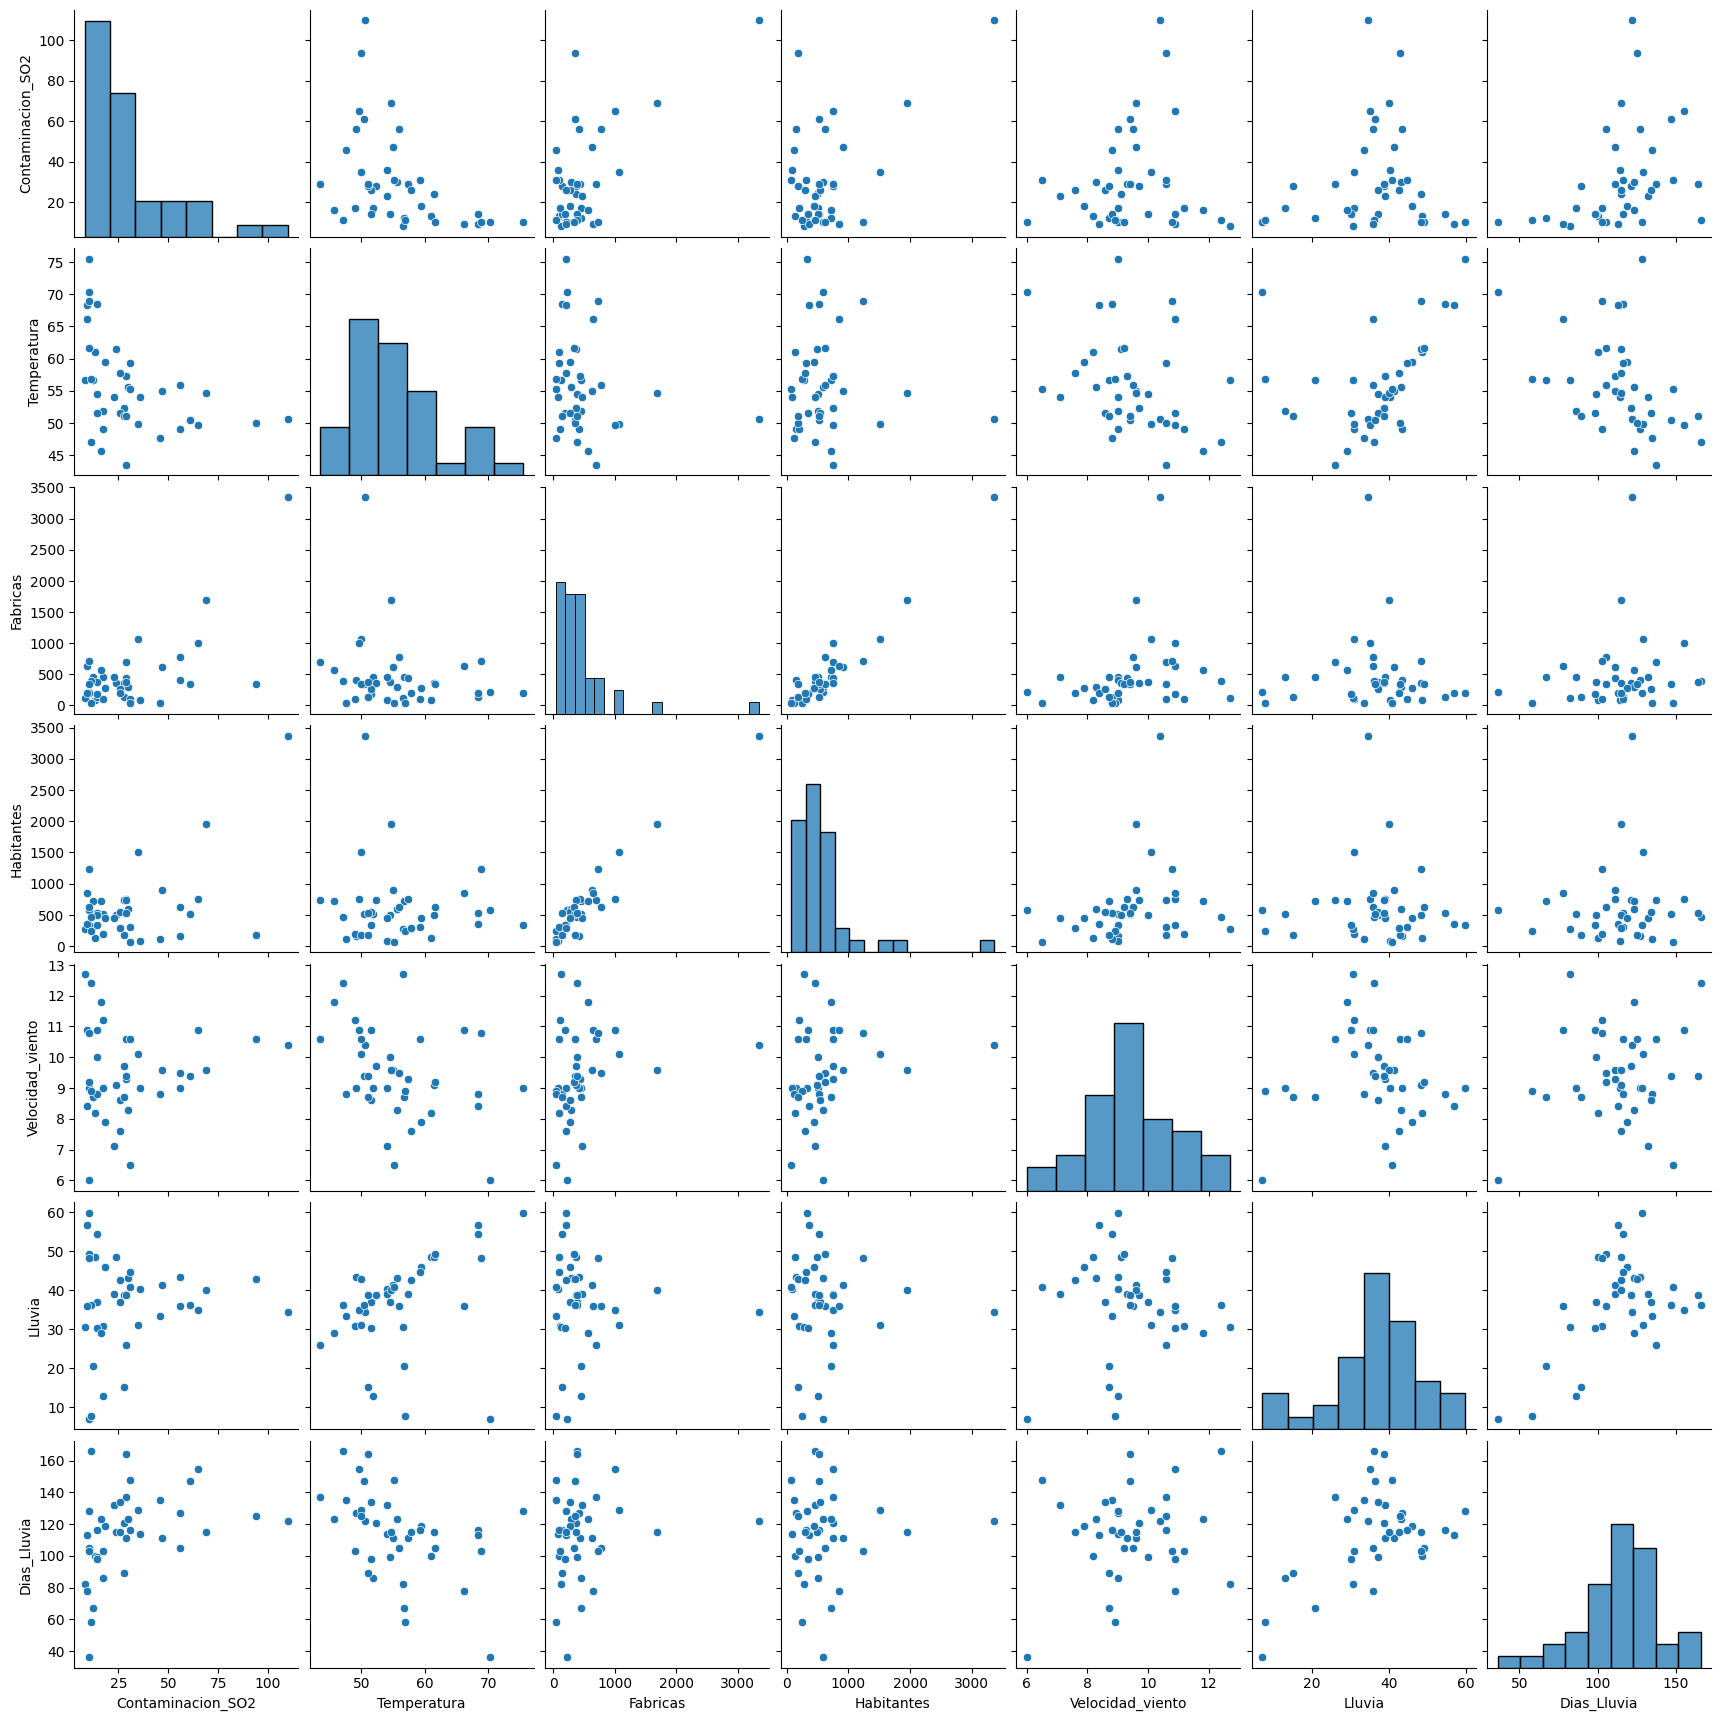

In [44]:
import seaborn as sns
sns.pairplot(cont)

En la diagonal, este diagrama muestra el histograma de cada variable, con esto podemos ver
si tiene distribución normal.

**Regla de plata:** *Si hay interferencia humana, es casi seguro que no tendrá distribución normal.*

Para verificar si una variable tiene distribución normal, primero mostremos el resultado con
una ficticia creada para este proposito:

In [45]:
# Conjunto de datos ficticio con distribución normal
data = np.random.randn(50000) * 20 + 20

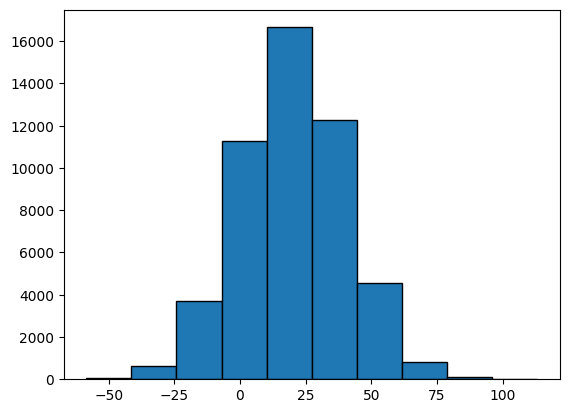

In [46]:
plt.hist(data, edgecolor='black', linewidth=1)
plt.show()

In [47]:
from scipy.stats import shapiro
estad , p_value = shapiro (data)
print(f'Estadístico = {estad:.3f} , p_value = {p_value:.3f}')
# p_value > 0.05 = > distribución normal

Estadístico = 1.000 , p_value = 0.810


C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


Como el `p_value` es mayor a 0.05, esta prueba indica que la variable tiene distribución normal.
Regresando al conjunto de datos de contaminación:


(array([ 2.,  1.,  2.,  4., 12.,  7.,  5.,  5.,  1.,  2.]),
 array([ 6.  ,  6.67,  7.34,  8.01,  8.68,  9.35, 10.02, 10.69, 11.36,
        12.03, 12.7 ]),
 <BarContainer object of 10 artists>)

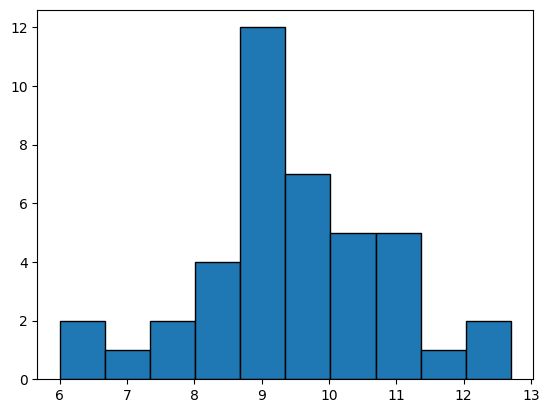

In [48]:
plt.hist(cont.Velocidad_viento, edgecolor='black', linewidth=1)

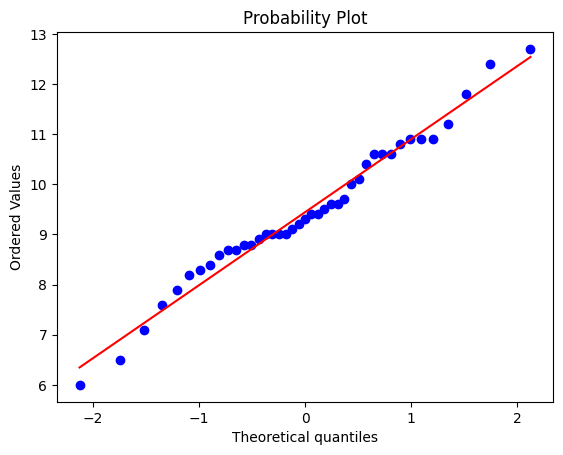

In [49]:
stats.probplot(cont.Velocidad_viento, dist='norm', plot=pylab)
pylab.show()

Esta gráfica indica que la distribución es normal si los puntos está distribuídos cerca de la
recta. Además, podemos aplicar un contraste de normalidad con Shapiro:

In [50]:
_, p_value = stats.shapiro(cont.Velocidad_viento)
print('p_value = ', p_value)

p_value =  0.6972579783041464


Con estos resultados podemos concluir que la variable `Velocidad_viento` tiene distribución
normal.

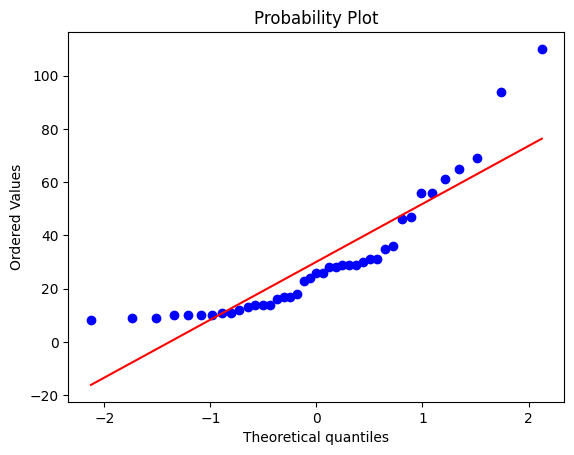

In [51]:
stats.probplot(cont.Contaminacion_SO2, dist='norm', plot=pylab)
pylab.show()

Revisemos los datos de `Contaminacion_SO2`

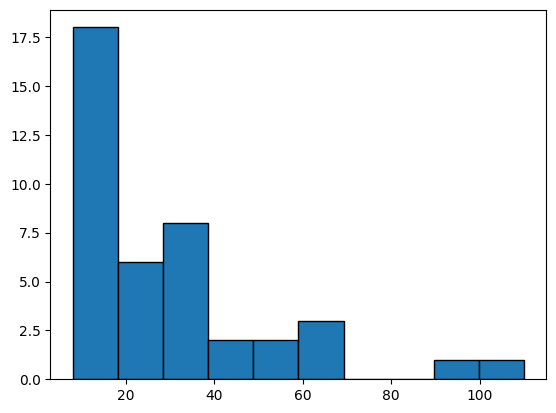

In [52]:
plt.hist(cont.Contaminacion_SO2, edgecolor='black', linewidth=1)
plt.show()

In [53]:
_, p_value = stats.shapiro(cont.Contaminacion_SO2)
print('p_value =', p_value)

p_value = 9.723376400158192e-06


`p_value` $< 0.05$ $\Rightarrow$ No tiene distribución normal

Con estos resultados podemos concluir que la variable Contaminacion_SO2 no tiene distribución normal.

### Función para encontrar anomalías en los datos

In [54]:
def find_anomalies(data, cut=3):
    anomalies = []
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut = cut * data_std
    low_lim = data_mean - anomaly_cut
    upp_lim = data_mean + anomaly_cut
    for d in data:
        if d > upp_lim or d < low_lim:
            anomalies.append(d)
    return anomalies

In [55]:
len(find_anomalies(data))

127

### Boxplot

<Axes: >

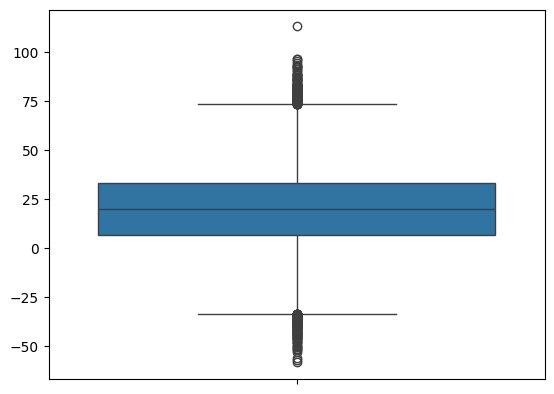

In [56]:
sns.boxplot(data)

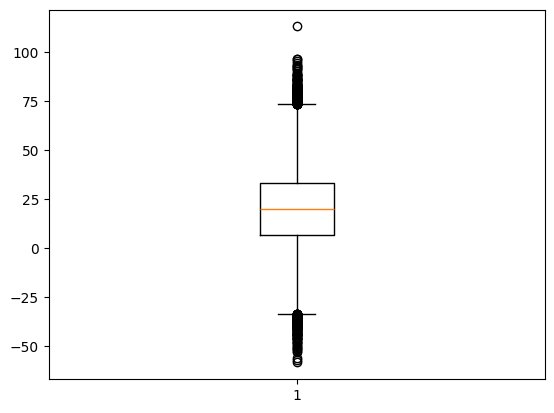

In [57]:
bp = plt.boxplot(x=data)

In [58]:
type(bp)

dict

In [59]:
bp.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [60]:
bp['fliers']

Se pueden recuperar los outliers en la versión de matplotlib

In [61]:
bp['fliers'][0].get_data()[1].shape

(367,)

In [62]:
url = 'https://bit.ly/47bBIcL'
stocks = pd.read_csv(url, header='infer')
stocks.drop(['Date'], axis=1, inplace=True)
stocks.head()

,MSFT,F,BAC
0,29.860001,7.51,53.330002
1,29.809999,7.70,53.669998
2,29.639999,7.62,53.240002
3,29.930000,7.73,53.450001
4,29.959999,7.79,53.500000


<Axes: >

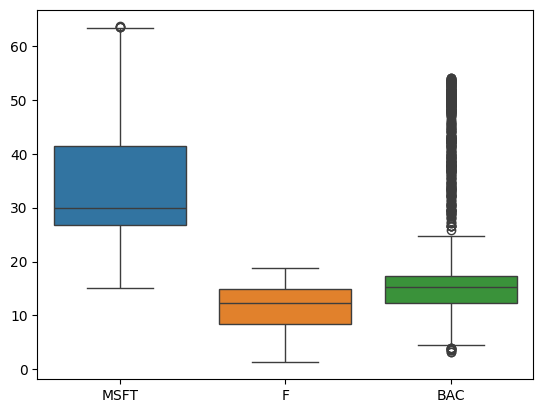

In [63]:
sns.boxplot(data=stocks)

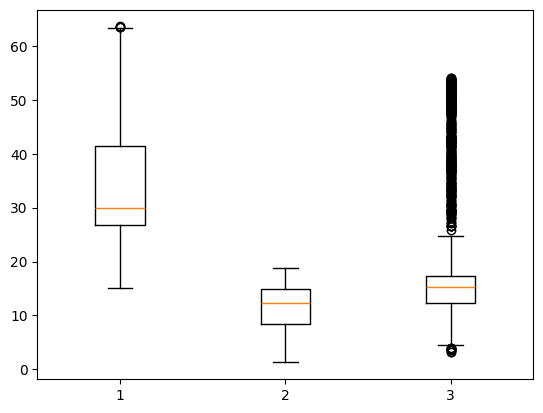

In [64]:
bp = plt.boxplot(x=stocks)

Datos de Microsoft

In [65]:
bp['fliers'][0].get_data()[1].shape

(4,)

Datos de Ford

In [66]:
bp['fliers'][1].get_data()[1].shape

(0,)

Datos de BAC

In [67]:
bp['fliers'][2].get_data()[1].shape

(441,)

### **Tarea: Función para obtener anomalías usando los cuartiles**

$$IQR = Q_3-Q_1$$
$$Q1:\text{ mediana de los } n/2 \text{ datos menores}$$
$$Q2:\text{ mediana de todos los datos}$$
$$Q3:\text{ mediana de los } n/2 \text{ datos mayores}$$
$$low = Q_1-1.5*IQR$$
$$upp = Q_3+1.5*IQR$$

In [68]:
def find_anomalies_alt(data):
    anomalies = []
    fp = data[:len(data)//2]
    sp = data[len(data)//2:]
    q1 = np.median(fp)
    q3 = np.median(sp)
    iqr = q3-q1
    low_lim = q1 - 1.5*iqr
    upp_lim = q3 + 1.5*iqr  
    for d in data:
        if d > upp_lim or d < low_lim:
            anomalies.append(d)
    return anomalies

In [69]:
len(find_anomalies_alt(data))

50000

# Selección de características significativas

Si se observa que un modelo tiene mejor rendimiento con el conjunto de entrenamiento que con
el de pruebas, es un indicador de sobreajuste; esto significa que el modelo adecúa sus parámetros
a las observaciones de los datos de entrenamiento, pero no generaliza bien a nuevos datos.
Entre las posibles soluciones al sobreajuste, se tiene la reducción de la dimensión de los datos

### Sequential Backward Selection (SBS)

Un algoritmo de selección común es el llamado Sequential Backward Selection (SBS)
cuyo objetivo es reducir la dimensión del espacio de características con un mínimo de pérdidas en
el rendimiento del modelo mejorando la eficiencia computacional. Además, SBS puede mejorar
también el poder predictivo de un modelo si está sobreajustado.

La idea detrás de SBS es simple: eliminar secuencialmente características de un conjunto hasta
que se tenga el número deseado de ellas. Para determinar qué columna eliminar se debe establecer
una función criterio $J$ ; uno muy usado es simplemente comparar el rendimiento del modelo antes
y después de eliminar una columna; la característica a eliminar será aquella que cause el menor
descenso en el rendimiento. El algoritmo puede describirse en cuatro pasos:

--------------

**Algorithm 1.1** Sequential Backward Selection

--------------

1. Inicializar el algoritmo con $k=d$, $d$ es la dimensión del espacio original de características $\mathbf{X}_d$
2. Determinar la característica $x^{-}$ que maximiza el criterio: $x^{-}=\text{arg max}(J(X_k-x))$, donde $x \in X_k$
3. Eliminar la característica $x^{-}$ del conjunto: $X_{k-1}=X_k-x^{-}$; $k=k-1$
4. Si $k$ es mayor que el número deseado de características, repetir desde el paso 2; de otro modo, terminar la ejecución.

### Reducción de dimensión no supervisada: Análisis de Componentes Principales (PCA)

PCA (Principal Component
Analysis) es un algoritmo de extracción de características. La diferencia principal es que en un
algoritmo de selección, se conservan las características originales y en uno de extracción, los datos
se transforman o proyectan en un nuevo espacio de características.

PCA ayuda a identificar patrones en los datos basado en la correlación entre las características;
es decir, intenta encontrar las direcciones de máxima varianza en datos con muchas dimensiones
y las proyecta en un nuevo subespacio con igual o menos dimensiones que el original. El algoritmo
se compone de los siguientes pasos:

--------------

**Algorithm 1.2** Principal Component Analysis

--------------

1. Estandarizar el conjunto de datos de dimensión $d$
2. Obtener la matriz de covarianza
3. Descomponer la matriz de covarianza en sus eigenvalores y eigenvectores
4. Ordenar los eigenvalores de manera decreciente junto con sus correspondientes eigenvectores
5. Seleccionar $k$ eigenvectores que corresponden con los $k$ mayores eigenvalores; $k$ es la dimensión de nuevo subespacio de características $(k<d)$
6. Construir una matriz de proyección $\mathbf{W}$ con los primeros $k$ eigenvectores
7. Transformar el conjunto de datos de entrada $\mathbf{X}$ de dimensión $d$ utilizando la matriz de proyección $\mathbf{W}$ para obtener el nuevo subespacio de características de dimensión $k$

In [70]:
import plotly.express as px

In [71]:
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig.show()

In [72]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [73]:
df_wine.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


#### Separar datos

In [74]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Estandarizar

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Matriz de covarianza y eigenpares

In [76]:
cov_mat = np.cov(X_train_std.T) #
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals = ', eigen_vals)

Eigenvals =  [4.61373785 2.58453281 1.62886742 0.98525803 0.74467783 0.58024601
 0.51884983 0.08971266 0.38030294 0.18573557 0.30450957 0.22916779
 0.26009276]


#### Gráfica con los aportes de cada eigenval

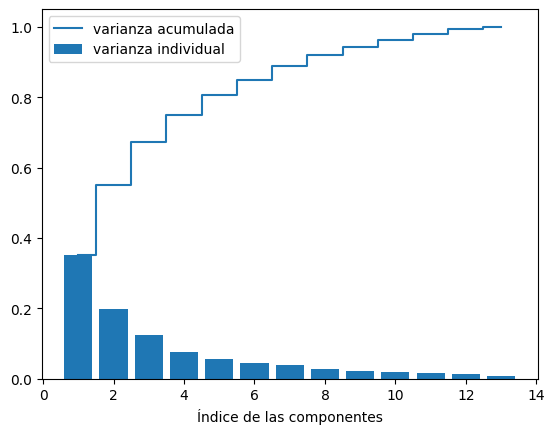

In [77]:
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, label='varianza individual', align='center')
plt.step(range(1,14), cum_var_exp, label='varianza acumulada', where='mid')
plt.xlabel('Índice de las componentes')
plt.legend(loc='best')
plt.show()

#### Lista de eigenpares

In [78]:
eigen_par = [ ( np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vecs)) ]
# ordenar de forma descendente
eigen_par.sort(key = lambda k:k[0], reverse=True)
eigen_par

[(np.float64(4.613737847832489),
  array([ 0.16317504, -0.22054862,  0.03326988, -0.20485232,  0.1604147 ,
          0.40912413,  0.42431705, -0.31248487,  0.33150791, -0.039605  ,
          0.28027151,  0.36561161,  0.2952349 ])),
 (np.float64(2.58453280729235),
  array([ 0.46677658,  0.22944415,  0.28904332, -0.01492102,  0.33275549,
          0.03204097, -0.02570396, -0.01258958, -0.07866516,  0.52879144,
         -0.28846569, -0.20144046,  0.35147545])),
 (np.float64(1.628867420085816),
  array([-0.17966808,  0.17200409,  0.6090976 ,  0.61414571,  0.05738038,
          0.16451309,  0.1741062 ,  0.23086785,  0.1654669 , -0.09981518,
          0.01496137,  0.16793656, -0.10109522])),
 (np.float64(0.985258026257325),
  array([ 0.07484188,  0.61720878, -0.18202295, -0.05280944, -0.42432247,
          0.12528847,  0.12514572, -0.23792292,  0.28312568,  0.01537486,
         -0.40985844,  0.19991027, -0.14550156])),
 (np.float64(0.7446778335354289),
  array([ 0.32641623,  0.08816768,  0.0

In [79]:
#dos -60% de la varianza total
w=np.hstack((eigen_par[0][1][:,np.newaxis],
             eigen_par[1][1][:,np.newaxis]))
print('Matriz w: \n', w)

Matriz w: 
 [[ 0.16317504  0.46677658]
 [-0.22054862  0.22944415]
 [ 0.03326988  0.28904332]
 [-0.20485232 -0.01492102]
 [ 0.1604147   0.33275549]
 [ 0.40912413  0.03204097]
 [ 0.42431705 -0.02570396]
 [-0.31248487 -0.01258958]
 [ 0.33150791 -0.07866516]
 [-0.039605    0.52879144]
 [ 0.28027151 -0.28846569]
 [ 0.36561161 -0.20144046]
 [ 0.2952349   0.35147545]]


Transformación de una muestra 1X13 a 1x2

In [80]:
print('Original: ', X_train_std[0])
print('Transformado: ', X_train_std[0].dot(w))

Original:  [-0.98798891 -0.71786332  0.57331492 -0.18095232  0.37009435 -0.63576235
 -0.33431385  0.75135682 -1.00522281 -0.87275934  2.08043958 -0.63081606
 -1.22763551]
Transformado:  [-0.83278886 -1.64253133]


Transformacion de todos los datos

In [81]:
X_train_pca = X_train_std.dot(w)
X_train_std.shape, X_train_pca.shape

((124, 13), (124, 2))

In [82]:
X_test_pca = X_test_std.dot(w)
X_test_std.shape, X_test_pca.shape

((54, 13), (54, 2))

#### Probando con una regresión logística

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='auto',solver='liblinear')
lr.fit(X_train_pca, y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', solver='liblinear')

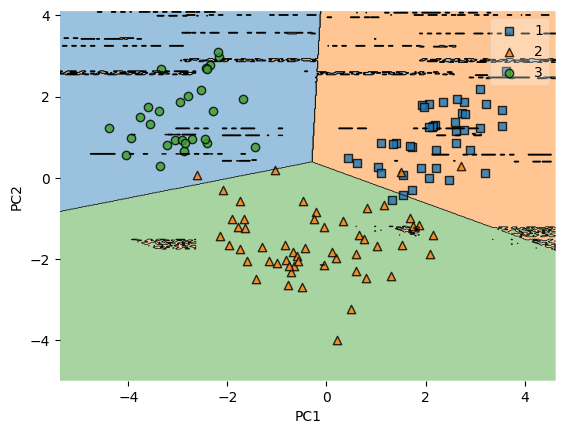

In [84]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train,legend=1,clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

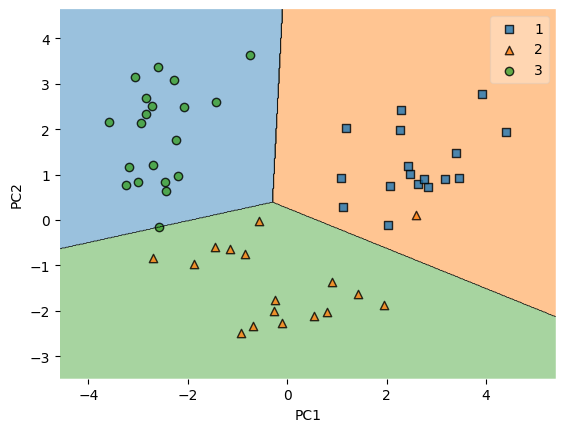

In [85]:
plot_decision_regions(X_test_pca, y_test,legend=1,clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### PCA de Scikitlearn

#### Datos

In [86]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [87]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3)

#### Estandarizado

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [89]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# Inicializar PCA y el modelo de RL
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver = 'liblinear')

#### Ajustar y transformar los datos

In [90]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', solver='liblinear')

#### Gráfica del conjunto de entrenamiento

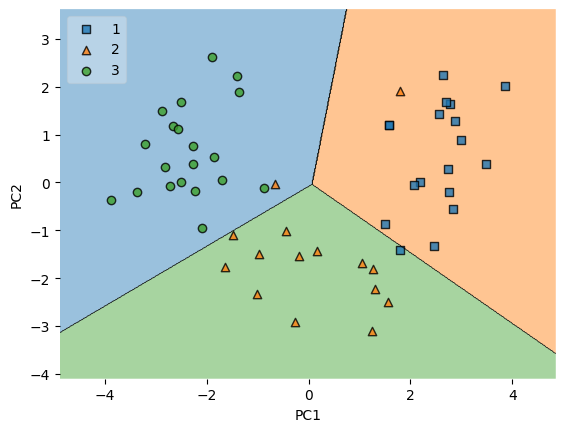

In [91]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train,legend=2, clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Gráfica del conjunto de pruebas

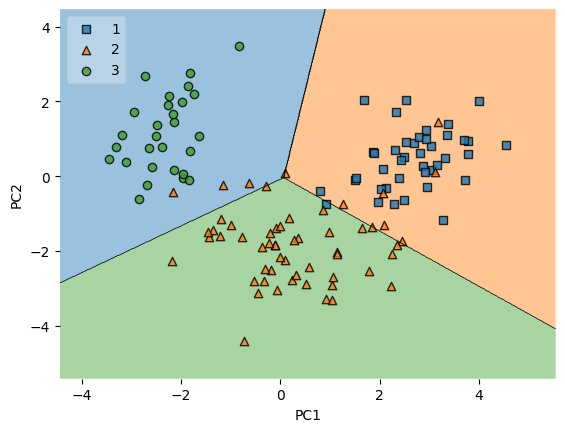

In [92]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_pca, y_test, legend=2, clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Reducción de dimensión supervisada: Análisis Lineal Discriminante (LDA)

Linear Discriminant Analysis (LDA) es una técnica de extracción de características
que puede usarse para incrementar la eficiencia computacional y reducir los sobreajustes. Formulado inicialmente por Ronald A. Fischer en 1936 con el conjunto de
datos de flores iris para problemas de clasificación de dos clases. En 1948 C. Radhakrishna Rao
lo generalizó para problemas multiclase bajo el supuesto de covarianzas
de clase iguales y clases con distribuciones normales.

En general, los conceptos detrás de LDA son muy similares a PCA: mientras PCA busca las
componentes ortogonales de varianza mínima, el objetivo de LDA es encontrar un subespacio de
características que optimice la separabilidad de clases.
El algoritmo se compone de los siguientes pasos:

--------------

**Algorithm 1.3** Linear Discriminant Analysis

--------------

1. Estandarizar el conjunto de datos de dimensión $d$
2. Para cada clase, calcular su vector de medias (de dimensión $d$)
3. Obtener la matriz de dispersión (*scatter matrix*) entre las clases $S_B$ y la matriz de dispersión de la propia clase $S_W$
4. Determinar los eigenvalores y eigenvectores correspondientes a la matriz $S_W^{-1}S_B$
5. Ordenar los eigenvalores de manera decreciente con sus correspondientes eigenvectores
6. Seleccionar los $k$ eigenvectores que corresponden con los $k$ mayores eigenvalores para contruir una $d \times k$-dimensional matriz de proyección $\mathbf{W}$; los eigenvectores son las columnas de dicha matriz
7. Proyectar las muestras sobre el nuevo subespacio de características utilizando la matriz de proyección $\mathbf{W}$

### **Tarea:**
 Implementar desde cero el cálculo de la matriz de covarianzas

In [93]:
def cov_matrix(X: np.ndarray, bias: bool = False) -> np.ndarray:
    """ Compute the covariance matrix of a dataset. Rows are the samples and columns are the features."""
    # Step 1: Calculate the mean of each column
    mean_X = np.mean(X, axis=0)
    
    # Step 2: Center the matrix by subtracting the mean of each column
    X_centered = X - mean_X
    
    # Step 3: Compute the covariance matrix
    n = X.shape[0]
    if bias:
        n += 1
    covariance_matrix = np.dot(X_centered.T, X_centered) / (n-1)
    
    return covariance_matrix
    

### **Tarea:**
Implementar desde cero el cálculo de la matriz de dispersión

$$ S = \sum_{j=1}^{n}(\mathbf{x}_j-\bar{\mathbf{x}})(\mathbf{x}_j-\bar{\mathbf{x}})^T$$

donde
- $S$  es la matriz de dispersión que se quiere obtener
- $n$  representa número de vectores o muestras en el conjunto de datos.
- $\mathbf{x}_j$ es el vector de las observaciones del dato $j$-ésimo (un punto en el espacio multidimensional).
- $\bar{\mathbf{x}}$  el vector de medias de cada clase (la media de cada dimensión del conjunto de datos).

y, 
$$\bar{\mathbf{x}}=\frac{1}{n}\sum_{j=1}^n \mathbf{x}_j$$

In [94]:
def scatter_matrix(X: np.ndarray) -> np.ndarray:
    """
    Computes the scatter matrix of a data matrix X.

    Parameters
    ----------
    X : numpy.ndarray
        A 2D numpy array where the rows are the samples and the columns are the features.
    
    Returns
    -------
    numpy.ndarray
        The scatter matrix of X.
    """
    num_features = X.shape[1]
    S = np.zeros((num_features, num_features))
    X_bar = np.mean(X, axis=0)
    for j in range(X.shape[0]):
        S += (X[j] - X_bar).reshape(-1,1) @ (X[j, :] - X_bar).reshape(1,-1)
    return S

### **Tarea:**
 Implementar el algoritmo LDA desde cero

In [95]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.W = None

    def fit(self, X, y):
        """
        Ajusta el modelo LDA.
        Calcula las matrices de dispersión intra-clase (Sw) y entre-clases (Sb),
        y obtiene los vectores propios más importantes.
        """
        # Estandarizar los datos
        X_std = StandardScaler().fit_transform(X)

        # Calcular Sw y Sb
        Sw = np.zeros((X.shape[1], X.shape[1]))  # Matriz de dispersión intra-clase
        Sb = np.zeros((X.shape[1], X.shape[1]))  # Matriz de dispersión entre-clases
        mu_global = np.mean(X_std, axis=0)  # Media global
        clases = np.unique(y)

        for clase in clases:
            X_clase = X_std[y == clase]  # Datos de una clase específica
            mu_clase = np.mean(X_clase, axis=0)  # Media de la clase
            Sw += scatter_matrix(X_clase)
            n_clase = X_clase.shape[0]
            Sb += n_clase * (mu_clase - mu_global).reshape(-1, 1) @ (mu_clase - mu_global).reshape(1, -1)

        # Calcular valores y vectores propios
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

        # Ordenar los vectores propios por su valor propio en orden descendente
        eig_pairs = [(np.abs(eig_vals[i]), np.real(eig_vecs[:, i])) for i in range(len(eig_vals))]
        eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

        # Guardar los n_components vectores propios en W
        self.W = np.hstack([eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(self.n_components)])

    def transform(self, X):
        """
        Transforma los datos X utilizando la matriz W obtenida del ajuste (fit).
        """
        if self.W is None:
            raise ValueError("El modelo no está ajustado. Llama primero a 'fit'.")

        # Estandarizar los datos de entrada
        X_std = StandardScaler().fit_transform(X)

        # Proyectar los datos en los componentes seleccionados
        return X_std @ self.W

### LDA de sklearn

In [96]:
# Si tus datos son etiquetados es mejor usar LDA
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Estandarizado

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Revisar con regresión logística

#### Modelos

In [98]:
# matriz de dispersion (cada fila de la matriz por la misma matriz)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
lda = LDA(n_components=2)
lr = LogisticRegression()

#### Ajustar y transformar los datos

In [99]:
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr.fit(X_train_lda,y_train)

LogisticRegression()

#### Grafica del conjunto de entrenamiento

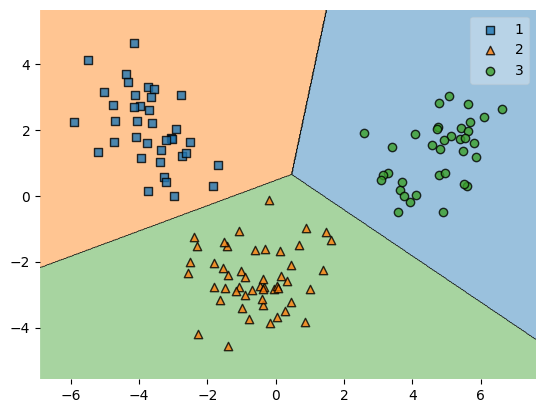

In [100]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda,y_train,clf=lr)
plt.show()

#### Grafica del conjunto de pruebas

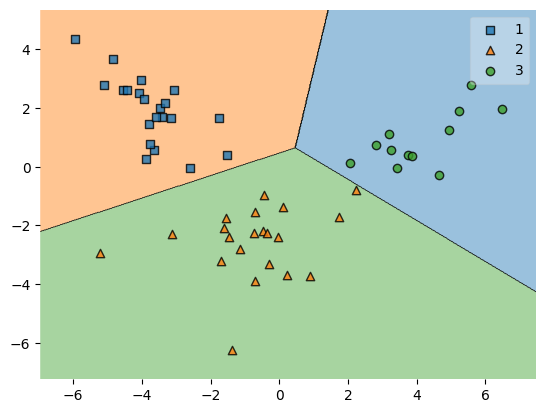

In [101]:
plot_decision_regions(X_test_lda,y_test,clf=lr)
plt.show()

### Reducción no lineal de dimensión: Análisis de Componentes Principales por Núcleos (KPCA)

In [102]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

Algunos algoritmos de aprendizaje automático suponen separabilidad lineal de los datos de
entrada; por ejemplo, el perceptrón requiere separabilidad perfecta para garantizar convergencia.
Por otro lado, existen algoritmos que suponen que la falta de separabilidad lineal se debe a ruido;
por ejemplo, la regresión logística.

Sin embargo, si tenemos un problema no lineal, muy comunes en aplicaciones reales, las
técnicas de transformación lineal para reducir la dimensión (PCA, LDA) pueden no ser una
buena opción. En esta sección se presenta una versión kernelizada (por núcleos) de PCA: Kernel
Principal Component Analysis (KPCA) para transformar datos que no son linealmente
separables en un subespacio nuevo de menor dimensión que sea adecuado para clasificadores
lineales.

Para implementar un KPCA con función de base radial (Radial Basis Function RBF o
Gaussiano) como kernel, se realizan los siguientes pasos:

--------------

**Algorithm 1.4** Kernel PCA

--------------

1. Obtener la matriz de núcleos $\mathbf{K}$ donde debe calcularse:
$$k(x^{(i)},x^{(j)})=\text{exp}(-\gamma||x^{(i)}-x^{(j)}||^2); \qquad \gamma=\frac{1}{2\sigma} \text{  para cada par de muestras:}$$

$$ \mathbf{K} =  \begin{bmatrix}
k(x^{(1)},x^{(1)}) & k(x^{(1)},x^{(2)}) & \cdots & k(x^{(1)},x^{(n)}) \\
k(x^{(2)},x^{(1)}) & k(x^{(2)},x^{(2)}) & \cdots & k(x^{(2)},x^{(1)}) \\
 \vdots & \vdots & \ddots & \vdots \\
 k(x^{(n)},x^{(1)})& k(x^{(n)},x^{(2)}) & \cdots & k(x^{(n)},x^{(n)}) \\
\end{bmatrix}$$

Es decir, si tenemos 100 muestras de entrenamiento, su matriz de núcleos sería de dimensión $100\times100$.

2. Centrar la matriz $\mathbf{K}$ utilizando $\mathbf{K}'=\mathbf{K}-1_n\mathbf{K}-\mathbf{K}1_n+1_n\mathbf{K}1_n$; donde $1_n$ es una matriz $n\times n$-dimensional en la que todos los valores son $\frac{1}{n}$
3. Seleccionar los $k$ eigenvectores de la matriz centrada que corresponden con los $k$ mayores eigenvalores

El centrado de la matriz (paso 2) se requiere porque no es posible garantizar que el nuevo
espacio esté centrado en cero. Otras funciones de núcleo comúnmente usadas son el kernel polinomial y el kernel tangente hiperbólico (sigmoide).

In [103]:
def rbf_kpca(X, gamma, n_components):
    """docstring"""
    # Obtener las distancias cuadradas de todas las parejas de vectores
    sq_dists = pdist(X, 'sqeuclidean')
    # Convertir a una matriz
    mat_sq_dists = squareform(sq_dists)
    # Obtener matriz de núcleos
    K = np.exp(-gamma * mat_sq_dists)
    # Centrar la matriz
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtener los eigenpares, scipy.linalg.eigh los devuelve ordenados (ascendente)
    eigenvals, eigenvecs = eigh(K)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1] # Invertir los eigenpares
    # Seleccionar los k primeros eigenpares
    alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
    lambdas = np.column_stack([eigenvals[i] for i in range (n_components)])
    return alphas, lambdas

#### Medias lunas

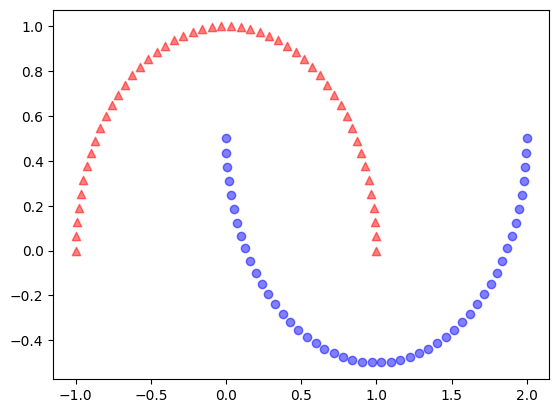

In [104]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

Intentamos separar los datos con PCA

In [105]:
from sklearn.decomposition import PCA

In [106]:
# No es necesario estandarizar porque los ejes tienen rangos similares
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

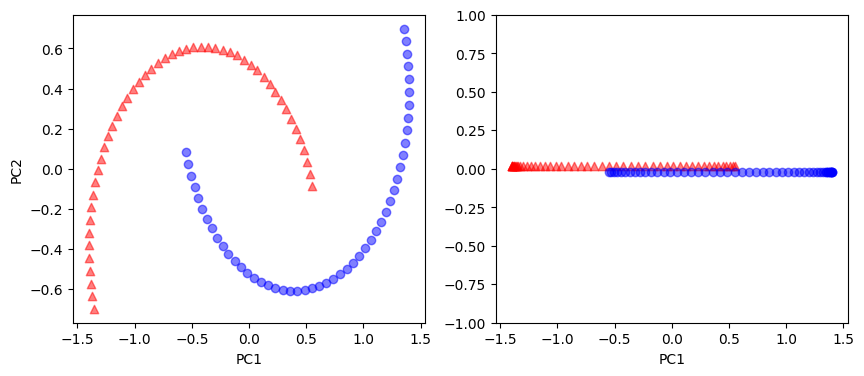

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

In [108]:
X_kpca, _ = rbf_kpca(X, gamma=15, n_components=2)

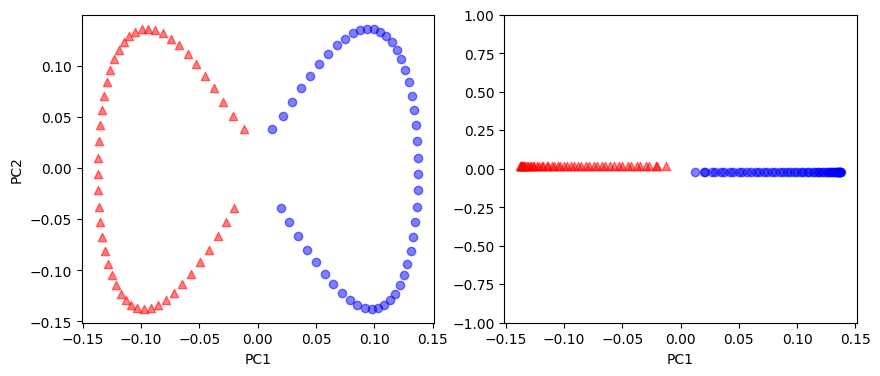

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

#### KPCA de Scikitlearn

In [110]:
from sklearn.decomposition import KernelPCA

In [111]:
X, y = make_moons(n_samples=100, random_state=123)

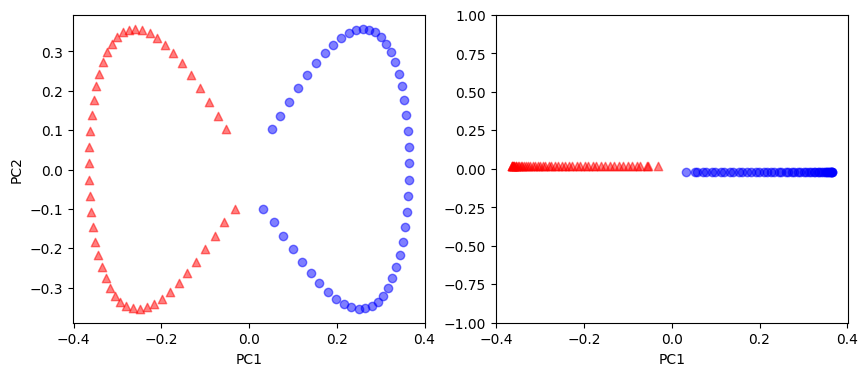

In [112]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

### **Tarea:** 
Otro conjunto interesante para probar *rbf_kpca* son círculos concéntricos; Scikitlearn incluye un generador de dicho conjunto:

In [113]:
# Datos: círculos concéntricos
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

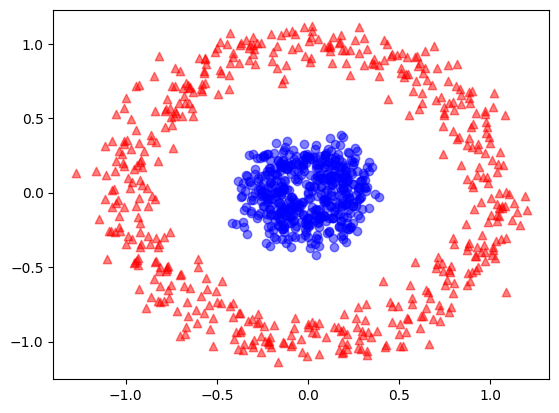

In [114]:
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

1. Probar que PCA no puede separar este conjunto:

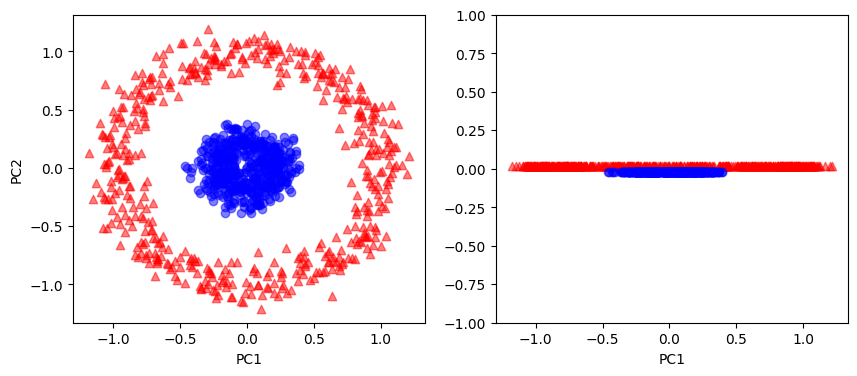

In [115]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

2. Mostrar que tanto *rbf_kpca* (propio) como KernelPCA de *sklearn* separan el conjunto de forma correcta:

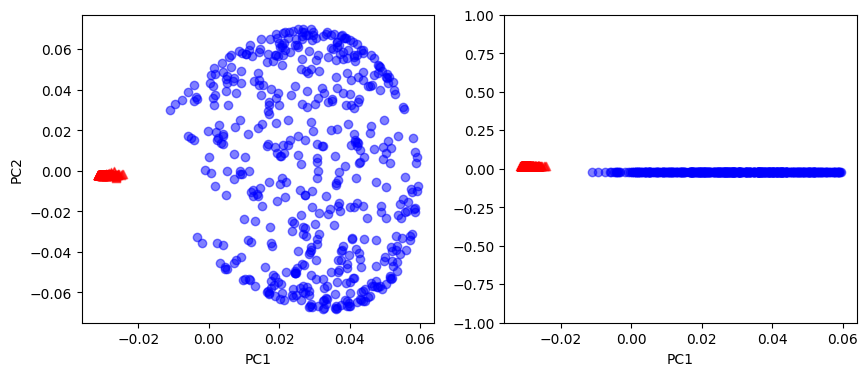

In [116]:
# Casero
X_kpca, _ = rbf_kpca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

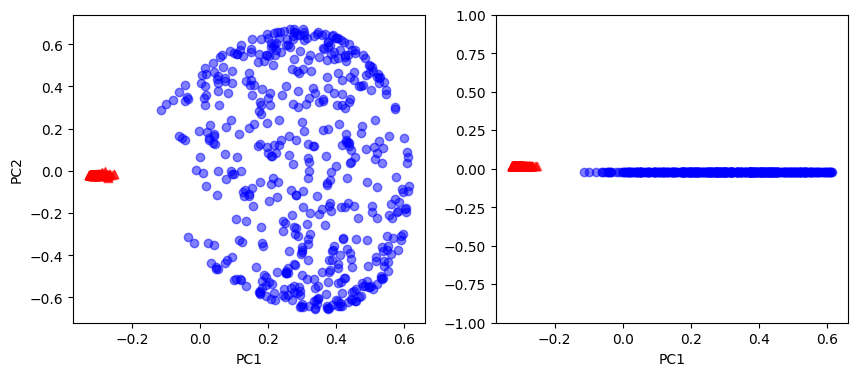

In [117]:
# Sklearn
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

3. Probar con una función de *kernel* diferente sobre el conjunto de medias lunas y el conjunto de círculos concéntricos.

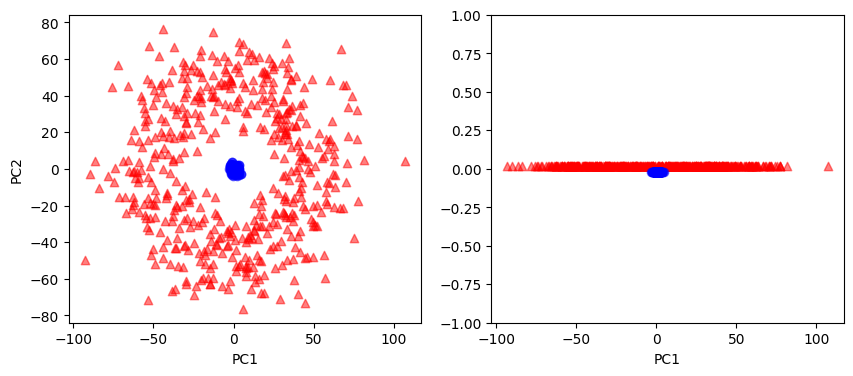

In [118]:
# Sklearn
kpca = KernelPCA(n_components=2, kernel='poly', gamma=15)
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((500,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

# Algoritmos escalables y estadística asociativa

### Algoritmos escalables

#### Observaciones univariadas

- Media y varianza muestrales:

Para una muestra de datos univariados $D=\{x_1,x_2,...,x_n\}$

$$\hat{\sigma}^2 = n^{-1} \sum_{i=1}^{n}(x_i-\hat{\mu})^2$$
$$=n^{-1}\sum_{i=1}^{n}x_i^{2}-(n^{-1}\sum_{i=1}^{n}x_i)^2$$

De lo anterior se deduce la estadística asociativa:

$$s(D)_{\mathbf{3\times1}} = \begin{bmatrix} \sum_{i=1}^{n}x_i \\ \sum_{i=1}^{n}x_i^{2} \\ n \end{bmatrix} $$

Para estimar la media y la varianza; sea $s(D) = [s_1,s_2,s_3]^T$, entonces los estimadores son:

$$\hat{\mu} = \frac{s_1}{s_3}$$
$$\hat{\sigma}^2=\frac{s_2}{s_3}-\left(\frac{s_1}{s_3}\right)^2$$

#### Observaciones multivariadas

Sea un conjunto de datos consistente de $n$ observaciones $D=\{\mathbf{x_1},...,\mathbf{x_n}\}$, donde cada una es un vector de $p$ variables $\mathbf{x}_i=[x_{i,1},...,x_{i,p}]^T$; suponiendo que son resultado de vectores aleatorios multivariados $\mathbf{X}_i=[X_1,...,\mathbf{X_p}]^T$ con esperanza $E(\mathbf{X})=\mu$ y matriz de varianzas $\text{var}(\mathbf{X})=\mathbf{Sigma}$, donde

$$\mathbf{\mu}_{p\times1}=[E(\mathbf{X_1}),...E(\mathbf{X}_p)]^T=[\mu_1,...,\mu_p]^T$$
y
$$\mathbf{\Sigma}_{p\times p}= \begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1p} \\
\sigma_{21} & \sigma_2^2 & \cdots & \sigma_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{p1} & \sigma_{p2} & \cdots & \sigma_p^2 \\
\end{bmatrix}$$

Los elementos de la diagonal $\sigma_1^2,...,\sigma_p^2$ son las varianzas de cada variable individual y los elementos fuera de la diagonal se conocen como covarianzas que describen la intensidad de la relación entre cada par de variables. El coeficiente de correlación poblacional:

$$\rho_{jk}=\frac{\sigma_{jk}}{\sigma_j\sigma_k}=\rho_{kj}$$

cuantifica la intensidad **lineal** de la asociación entre la j-ésima y k-ésima variable; está dentro del intervalo [-1,1]. Valores cercanos a 1 ó −1 indican una relación casi lineal entre ellas;
valores positivos indican una asociación positiva entre ambas, mientras que valores negativos son indicio de una relación negativa. Valores cercanos a 0 indican que de existir una relación entre
las variables es no lineal. La matriz de correlaciones se determina como:

$$\mathbf{\rho}_{p\times p}=\begin{bmatrix}
1 & \rho_{12} & \cdots & \rho_{1p} \\
\rho_{21} & 1 & \cdots & \rho_{2p} \\
\vdots & \vdots & \ddots & \cdots \\
\rho_{p1} & \rho_{p2} & \cdots & 1 \\
\end{bmatrix}$$

Los siguientes estimadores definen algoritmos escalables:

- Estimador de $\mu$ a partir de la media muestral:
$$\bar{\mathbf{x}}_{p\times 1}=n^{-1}\left[\sum_{i=1}^n x_{i,1},...,\sum_{i=1}^n x_{i,p}\right]^T$$

- Estimador de la varianza muestral:
$$\hat{\sigma_j^2}=n^{-1}\sum_{i=1}^nx_{i,j}^2-\bar{x}_j^2$$

- Estimador de covarianza entre las variables $j$ y $k$:
$$\hat{\sigma_{jk}}=n^{-1}\sum{i=1}^nx_{i,j}x_{i,k}-\bar{x}_j\bar{x}_k$$

- Estimador de $\mathbf{\Sigma}$:
$$\hat{\mathbf{\Sigma}}=n^{-1}\mathbf{M}-\bar{\mathbf{x}}\bar{\mathbf{x}}^T$$

donde $\mathbf{M}$ es la matriz de momentos:
$$\mathbf{M}_{p\times p}=\begin{bmatrix}
\sum x_{i,1}^2 & \sum x_{i,1}x_{i,2} & \cdots & \sum x_{i,1}x_{i,p} \\
\sum x_{i,2}x_{i,1} & \sum x_{i,2}^2 & \cdots & \sum x_{i,2}x_{i,p} \\
\vdots & \vdots & \ddots & \vdots \\
\sum x_{i,p}x_{i,1} & \sum x_{i,p}x_{i,2} & \cdots & \sum x_{i,p}^2 \\
\end{bmatrix}$$

y $\bar{\mathbf{x}}\bar{\mathbf{x}}^T$ es el producto externo del vector $\bar{\mathbf{x}}$ con su transpuesta:

$$\bar{\mathbf{x}}\bar{\mathbf{x}}^T_{p\times p} = \bar{\mathbf{x}}_{p\times 1} \bar{\mathbf{1 \times p}}^T = \begin{bmatrix}
\bar{x}_1^2 & \cdots & \bar{x}_1\bar{x}_p \\
\vdots & \ddots & \vdots \\
\bar{x}_p\bar{x}_1 & \cdots & \bar{x}_1^2 \\
\end{bmatrix}$$

- Estimador de $\rho$:
$$\mathbf{R}_{p \times p} = \begin{bmatrix}
1 & r_{12} & \cdots & r_{1p} \\
r_{21} & 1 & \cdots & r_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
r_{p1} & r_{p2} & \cdots & 1 \\
\end{bmatrix}$$

donde:
$$r_{jk}=\frac{\sum(x_{i,j}-\bar{x}_j)(x_{i,k})-\bar{x}_k}{\hat{\sigma_j}\hat{\sigma_k}}$$

#### Matriz de momentos aumentada

El cálculo de $\bar{\mathbf{x}}$, $\hat{\mathbf{\Sigma}}$ y $\mathbf{R}$ puede acelerarse si se aumentan los vectores de datos insertando un 1
al inicio de cada uno; obteniendo a partir de estos vectores la matriz de momentos aumentada. El i-ésimo vector aumentado es:

$$\mathbf{w}_{i_{(\mathbf{p+1})\times 1}} = \begin{bmatrix}1 \\ \mathbf{x}_{i_{p\times1}}\end{bmatrix} = \begin{bmatrix} 1 \\ x_{i,1} \\ \vdots \\ x_{i,p} \end{bmatrix}$$

El producto externo de $\mathbf{w}_i$ consigo mismo es una matriz de orden $(p+1)\times(p+1)$:

$$\mathbf{w}_i\mathbf{w}_i^T=\begin{bmatrix} 1 \\ x_{i,1} \\ \vdots \\ x_{i,p} \end{bmatrix} \begin{bmatrix} 1 & x_{i,1} & \cdots & x_{i,p} \end{bmatrix}=\begin{bmatrix} 1 & x_{i,1} & \cdots & x_{i,p} \\ x_{i,1} & x_{i,1}^2 & \cdots & x_{i,1}x_{i,p} \\ \vdots & \vdots & \ddots & \vdots \\ x_{i,p} & x_{i,p}x_{i,1} & \cdots & x_{i,p}^2 \end{bmatrix}$$

Sumando $n$ productos externos, obtenemos la matriz aumentada $\mathbf{A}$:

$$\mathbf{A}_{(p+1)\times(p+1)}=\sum\mathbf{w}_i\mathbf{w}_i^T=\begin{bmatrix}
n & \sum x_{i,1} & \sum x_{i,2} & \cdots & \sum x_{i,p} \\
\sum x_{i,1} & \sum x_{i,1}^2 & \sum x_{i,1}x_{i,2} & \cdots & \sum x_{i,1} x_{i,p} \\
\sum x_{i,2} & \sum x_{i,2}x_{i,1} & \sum x_{i,2}^2 & \cdots & \sum x_{i,2}x_{i,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x_{i,p} & \sum x_{i,p}x_{i,1} & \sum x_{i,p}x_{i,2} & \cdots & \sum x_{i,p}^2 \\
\end{bmatrix}$$

La matriz de momentos aumentada $\mathbf{A}$ difiere de la matriz de momentos $\mathbf{M}$ al tener una fila y columna adicional en la parte superior e izquierda que contiene $n$ y la suma de cada variable; por lo tanto $\mathbf{A}$ puede expresarse como:

$$\mathbf{A}=\begin{bmatrix} n_{1\times1} & n\bar{\mathbf{x}_{1\times p}^T} \\ n \bar{\mathbf{x}}_{p \times 1} & \mathbf{M}_{p \times p}\end{bmatrix}$$

La matriz de momentos aumentada es una estadística asociativa y a partir de $\mathbf{A}$, se extraen directamente $\mathbf{M}$ y $\bar{\mathbf{x}}$; con estos, se puede obtener la matriz de covarianzas $\hat{\mathbf{Sigma}}=n^{-1}\mathbf{M}-\bar{\mathbf{x}}\bar{\mathbf{x}}^T$. Así mismo, $\mathbf{D}$ y $\mathbf{R}$ pueden ser facilmente calculadas.

En un entorno distribuido, se crea una partición $D_1,D_2,...,D_r$ del conjunto de datos $D$ y cada subconjunto se procesa independientemenete. El subconjunto $D_j$ entrega una matriz $\mathbf{A}_j$ y las matrices $\mathbf{A}_1...\mathbf{A}_r$ se combinan al final de los $r$ procesos para obtener $\mathbf{A}$ de la siguiente manera:

$$\mathbf{A} = \sum_{j=1}^r\mathbf{A}_j$$

### **Tarea:**
Escribir un código que obtenga la matriz de momentos aumentada a partir de un conjunto de vectores de datos.

$$\mathbf{A}_{(p+1)\times(p+1)}=\sum\mathbf{w}_i\mathbf{w}_i^T=\begin{bmatrix}
n & \sum x_{i,1} & \sum x_{i,2} & \cdots & \sum x_{i,p} \\
\sum x_{i,1} & \sum x_{i,1}^2 & \sum x_{i,1}x_{i,2} & \cdots & \sum x_{i,1} x_{i,p} \\
\sum x_{i,2} & \sum x_{i,2}x_{i,1} & \sum x_{i,2}^2 & \cdots & \sum x_{i,2}x_{i,p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum x_{i,p} & \sum x_{i,p}x_{i,1} & \sum x_{i,p}x_{i,2} & \cdots & \sum x_{i,p}^2 \\
\end{bmatrix}$$


In [160]:
def augmented_moment_matrix(X: np.ndarray) -> np.ndarray:
    """
    Computes the augmented moment matrix of a dataset X.

    Parameters
    ----------
    X : numpy.ndarray
        A 2D numpy array where the rows are the samples and the columns are the features.
    
    Returns
    -------
    numpy.ndarray
        The moments matrix of X.
    """
    num_features = X.shape[1]
    A = np.zeros((num_features+1, num_features+1))
    w = np.insert(X, 0, 1, axis=1)
    for i in range(X.shape[0]):
        A += w[i].reshape(-1,1) @ w[i].reshape(1,-1)
    return A

In [161]:
X = np.array([[1, 9],
              [3, 7]])
augmented_moment_matrix(X)

array([[  2.,   4.,  16.],
       [  4.,  10.,  30.],
       [ 16.,  30., 130.]])

### Histogramas

Un histograma se define matemáticamente como un conjunto de pares
$$H=\{(b_1,p_1),...,(b_h,p_h)\}$$

El número de intervalos es $h$; el primero es $b_1=[l_1,u_1]$ y para $i>1$, el $i$-ésimo intervalo es $b_i=(l_i,u_i]$. El segundo elemento de cada pareja, $p_i$ es la frecuencia relativa de las observaciones que pertenecen a ese intervalo; este término se puede utilizar como un estimador de la proporción de la población que pertenece a $b_i$. El siguiente intervalo $(b_{i+1})$ toma como límite inferior $(l_{i+1})$ el límite superior anterior $(u_i)$ i.e. $l_{i+1} = u_i$. En general, todas las observaciones del conjunto de datos pertenecen a la base $[l_1, u_h]$ del histograma.

Supongamos que el conjunto de datos es tan grande que no puede almacenarse en memoria; entonces, se requiere un algoritmo escalable para construir el histograma $H$. En resumen, $H$ se construye contando el número de observaciones de cada intervalo; esto implica que los datos se procesarán dos veces: en la primera pasada se determina el número y el tamaño de cada intervalo, en la segunda se obtiene el número de observaciones de cada intervalo.

Un algoritmo que ayude a construir un histograma comienza con la obtención de la mínima $(x(1))$ y máxima $(x(n))$ observación en $D$. La primera pasada sobre los datos permite obtener el rango de valores $(x(n)-x(1))$; y la anchura de cada intervalo $w=\frac{x(n)-x(1)}{h}$, donde $h$ es el número de intervalos deseado. Los intervalos obtenidos son:

$$b_1 = [x_1, x_1+w]$$
$$\vdots$$
$$b_i = (x_1+(i-1)w, x_1+(i)w]$$
$$\vdots$$
$$b_h = (x_1+(h-1)w, x_n]$$

Es decir, se crea un mapeo del conjunto de datos $D$ a un conjunto de intervalos (contenedores, *bins*) $B={b_1,...,b_h}$.

La segunda parte del algoritmo mapea $D$ y $B$ a un diccionario $C$ en el cual las llaves son los intervalos y los valores son el total de observaciones contenidas en cada intervalo.

### **Tarea:**
Obtener las expresiones para determinar los intervalos de contenedores para histogramas
bidimensionales en función del número de contenedores (bins); así como la forma de determinar el total de observaciones de cada contenedor

In [121]:
def histograma_2d(D: np.ndarray, bins: int) -> np.ndarray:
    """
    Computes the histogram of a dataset X.

    Parameters
    ----------
    D : numpy.ndarray
        A 1D numpy array where the samples are.
    bins : int
        The number of bins to use in the histogram.
    
    Returns
    -------
    numpy.ndarray
        The histogram of X.
    """
    max_val = np.max(D)
    min_val = np.min(D)
    w = (max_val - min_val) / bins
    B = np.zeros(bins+1)
    B[0] = min_val
    for i in range(1, bins):
        B[i] = B[i-1] + w
    B[bins] = max_val
    C = {(round(float(B[i]), 4), round(float(B[i+1]), 4)): 0 for i in range(bins)}
    for d in D:
        for i in range(bins):
            if B[i] < d <= B[i+1]:
                C[(round(float(B[i]), 4), round(float(B[i+1]), 4))] += 1
    return C

In [122]:
D = np.random.randint(1, 100, 100)
D

array([59, 64, 67, 41, 72, 85, 27,  5, 25, 60, 70, 30, 77, 72, 91, 67, 92,
       40, 61, 16, 49, 41, 40, 75, 93, 66, 59, 72, 90, 21, 50, 69,  6, 42,
       75, 99, 76, 17, 67, 42, 44, 75, 54, 69, 31, 19, 91, 94, 70, 13, 60,
       33, 67, 70,  3, 90, 13, 73, 39, 96, 35, 32, 91, 26, 83, 92, 12, 93,
       96, 22, 81,  6, 88, 80, 28, 99, 11, 40, 20, 61, 76, 43,  9, 56, 63,
       26, 12, 62, 34, 59, 39, 69, 92, 15, 60,  6, 16, 64, 89, 97],
      dtype=int32)

In [123]:
histograma_2d(D, 10)

{(3.0, 12.6): 8,
 (12.6, 22.2): 10,
 (22.2, 31.8): 7,
 (31.8, 41.4): 11,
 (41.4, 51.0): 6,
 (51.0, 60.6): 8,
 (60.6, 70.2): 17,
 (70.2, 79.8): 10,
 (79.8, 89.4): 6,
 (89.4, 99.0): 16}

In [124]:
url = 'http://bit.ly/2cLzoxH'
brecha = pd.read_csv(url)
brecha.head(3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


In [125]:
brecha.tail(3)

,country,year,pop,continent,lifeExp,gdpPercap
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


#### Usando pandas

<Axes: >

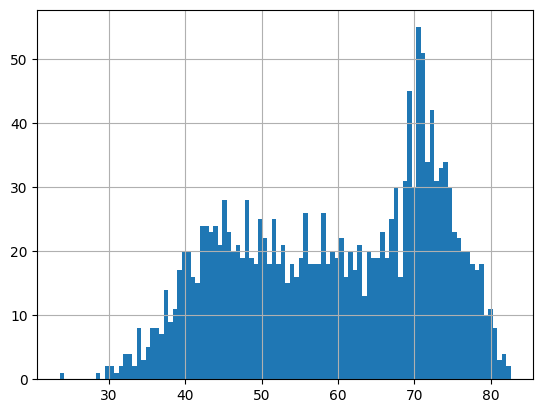

In [126]:
brecha.lifeExp.hist(bins=100)

<Axes: >

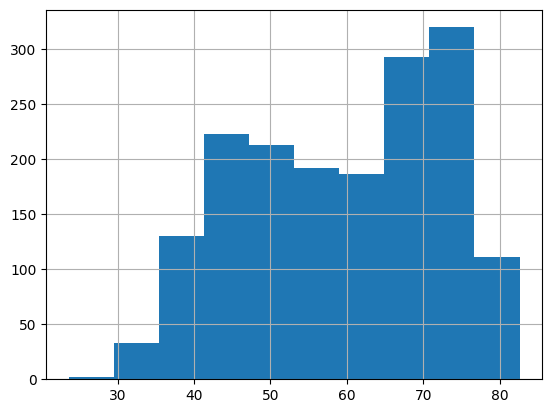

In [127]:
brecha['lifeExp'].hist(bins=10)

Text(0, 0.5, 'Frecuencia')

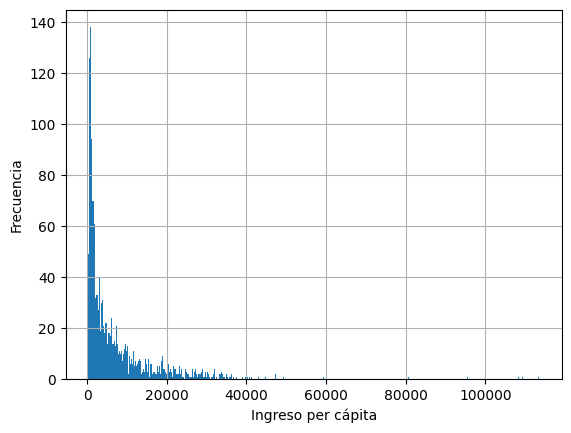

In [128]:
brecha.gdpPercap.hist(bins=500)
plt.xlabel('Ingreso per cápita')
plt.ylabel('Frecuencia')
# plt.show()

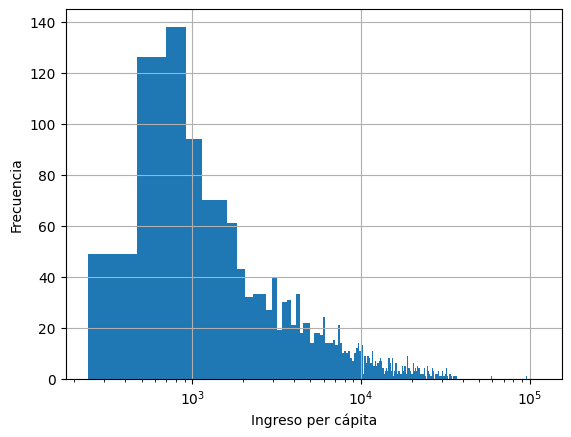

In [129]:
brecha.gdpPercap.hist(bins=500)
plt.xlabel('Ingreso per cápita')
plt.ylabel('Frecuencia')
plt.xscale('log')

#### Usando seaborn

C:\Users\denis\AppData\Local\Temp\ipykernel_8360\4167861991.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='lifeExp', ylabel='Density'>

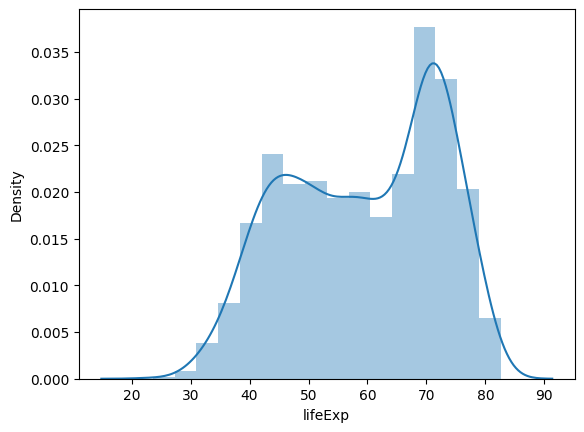

In [130]:
sns.distplot(brecha.lifeExp)

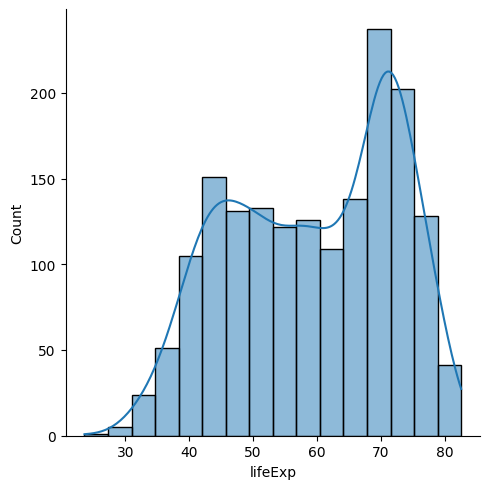

In [131]:
sns.displot(brecha.lifeExp, kde=True)

<Axes: xlabel='lifeExp', ylabel='Count'>

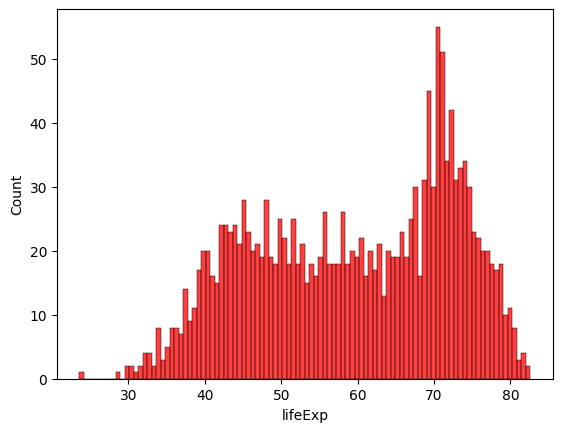

In [132]:
sns.histplot(brecha.lifeExp, kde=False, color='red', bins=100)

C:\Users\denis\AppData\Local\Temp\ipykernel_8360\935011116.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Frecuencia ')

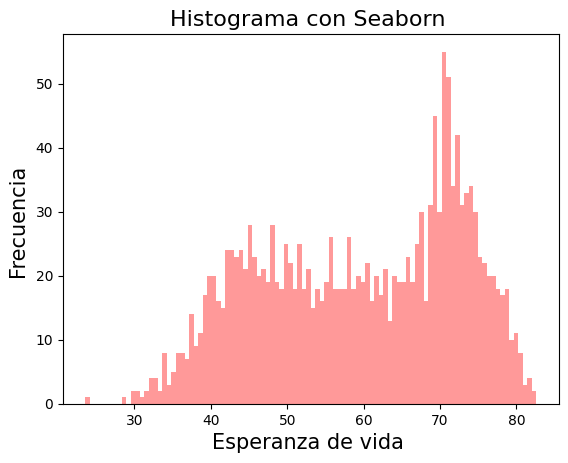

In [133]:
sns.distplot(brecha['lifeExp'], kde=False , color='red', bins =100)
plt.title('Histograma con Seaborn ', fontsize =16)
plt.xlabel('Esperanza de vida ', fontsize =15)
plt.ylabel('Frecuencia ', fontsize =15)

Dos histogramas superpuestos

C:\Users\denis\AppData\Local\Temp\ipykernel_8360\2176028736.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\denis\AppData\Local\Temp\ipykernel_8360\2176028736.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




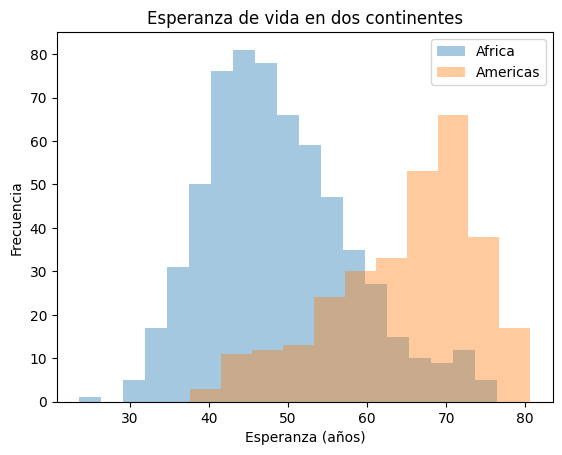

In [134]:
df = brecha[brecha.continent=='Africa']
sns.distplot(df.lifeExp, kde=False, label='Africa')
df = brecha[brecha.continent=='Americas']
sns.distplot(df.lifeExp, kde=False, label='Americas')
plt.title('Esperanza de vida en dos continentes')
plt.xlabel('Esperanza (años)')
plt.ylabel('Frecuencia')
plt.legend()

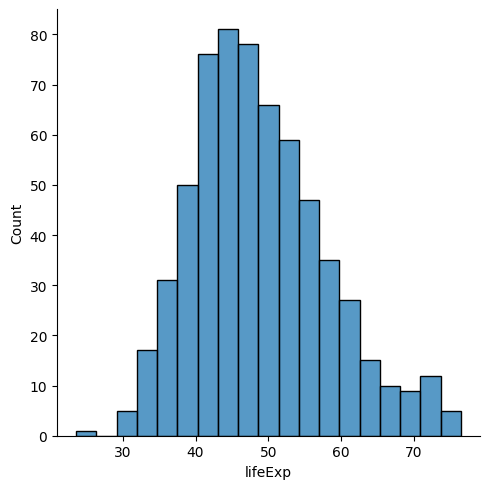

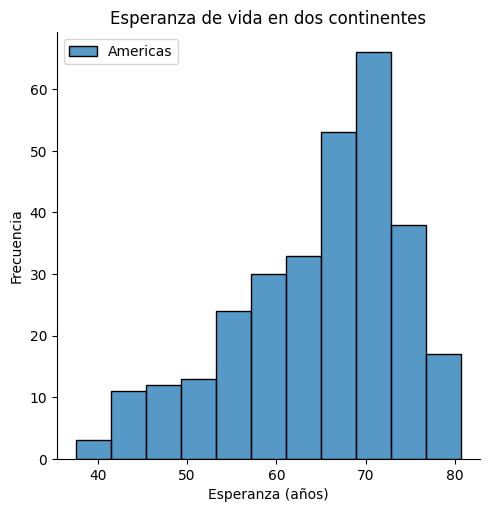

In [135]:
df = brecha[brecha.continent=='Africa']
sns.displot(df.lifeExp, kde=False, label='Africa')
df = brecha[brecha.continent=='Americas']
sns.displot(df.lifeExp, kde=False, label='Americas')
plt.title('Esperanza de vida en dos continentes')
plt.xlabel('Esperanza (años)')
plt.ylabel('Frecuencia')
plt.legend()

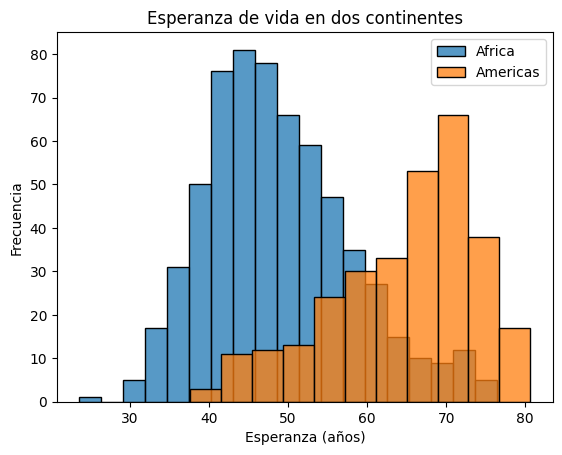

In [136]:
df = brecha[brecha.continent=='Africa']
sns.histplot(df.lifeExp, kde=False, label='Africa')
df = brecha[brecha.continent=='Americas']
sns.histplot(df.lifeExp, kde=False, label='Americas')
plt.title('Esperanza de vida en dos continentes')
plt.xlabel('Esperanza (años)')
plt.ylabel('Frecuencia')
plt.legend()

Dos curvas KDE superpuestas

C:\Users\denis\AppData\Local\Temp\ipykernel_8360\1479485059.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\denis\AppData\Local\Temp\ipykernel_8360\1479485059.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




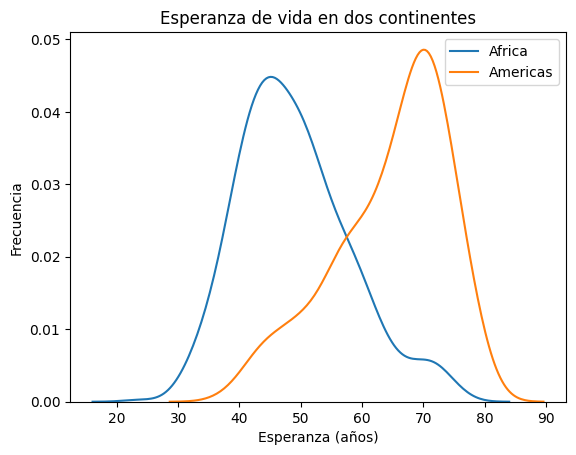

In [137]:
df = brecha[brecha.continent=='Africa']
sns.distplot(df.lifeExp, kde=True, hist=False, label='Africa')
df = brecha[brecha.continent=='Americas']
sns.distplot(df.lifeExp, kde=True, hist=False, label='Americas')
plt.title('Esperanza de vida en dos continentes')
plt.xlabel('Esperanza (años)')
plt.ylabel('Frecuencia')
plt.legend()

Dos histogramas superpuestos con curvas KDE

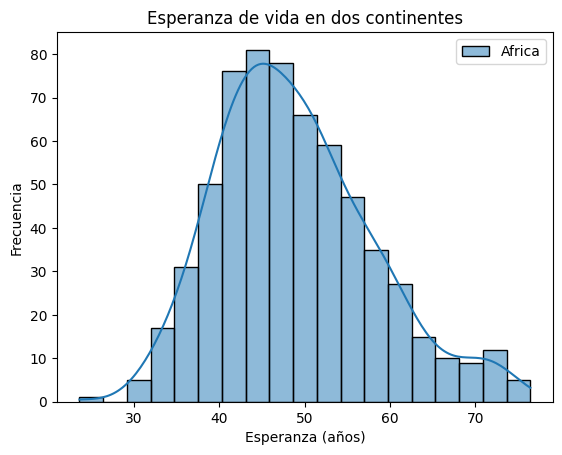

In [138]:
df = brecha[brecha.continent=='Africa']
sns.histplot(df.lifeExp, kde=True, label='Africa')
df = brecha[brecha.continent=='America']
sns.histplot(df.lifeExp, kde=True, label='America')
plt.title('Esperanza de vida en dos continentes')
plt.xlabel('Esperanza (años)')
plt.ylabel('Frecuencia')
plt.legend()

#### Usando Matplotlib

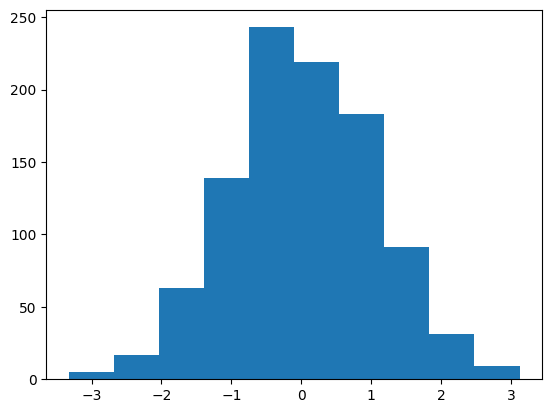

In [139]:
# sns.set_theme()
sns.reset_orig()
data = np.random.randn(1000)
plt.hist(data)
plt.show()

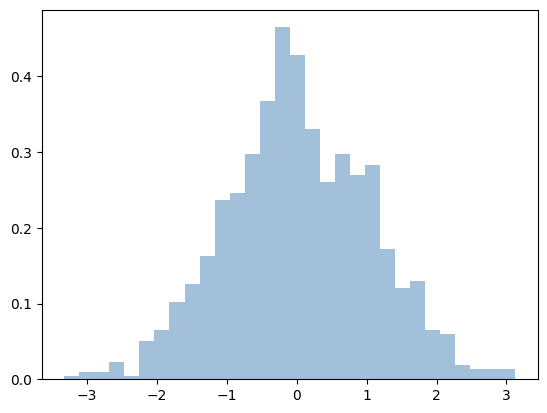

In [140]:
plt.hist(data, bins = 30, density = True, alpha = 0.5,
histtype = 'stepfilled', color = 'steelblue',
edgecolor = 'None')
plt.show()

In [141]:
x1 = np.random.normal(0, 0.7, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 1.6, 1000)

Formato

<function matplotlib.pyplot.show(close=None, block=None)>

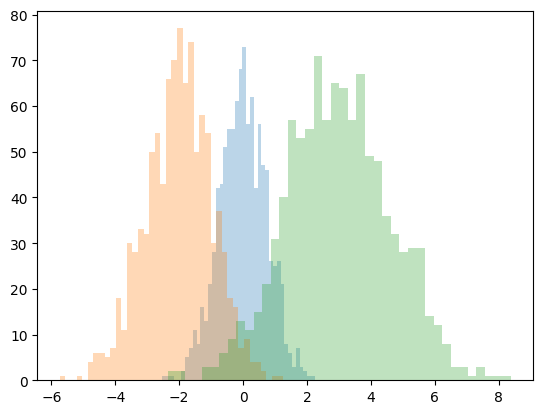

In [142]:
d = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **d)
plt.hist(x2, **d)
plt.hist(x3, **d)
plt.show

Histogramas bidimensionales

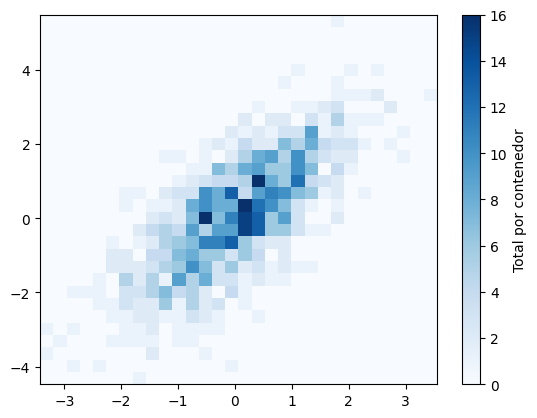

In [143]:
mean = [0,0]
cov = [[1,1],[1,2]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Total por contenedor')

In [144]:
#Obtener el total de elementos en cada contenedor
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

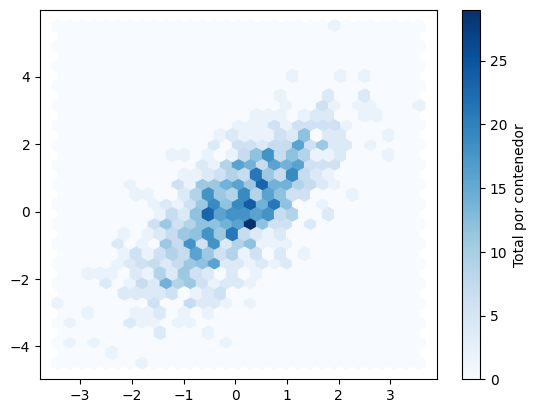

In [145]:
plt.hexbin(x, y, gridsize = 30, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Total por contenedor')

#### Seaborn

<Axes: >

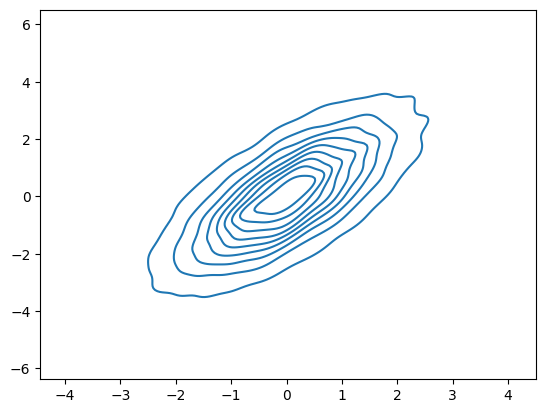

In [146]:
x, y = np.random.multivariate_normal(mean, cov, 10000).T
sns.kdeplot(x = x, y = y)

Histogramas bidimensionales: vista en 3D

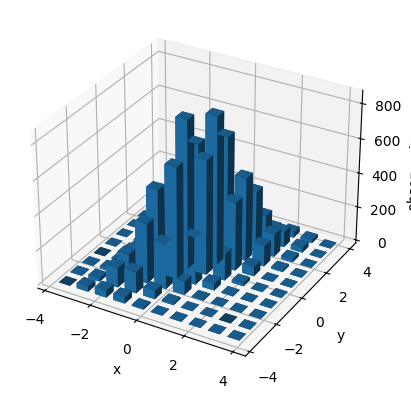

In [147]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x,y = np.random.multivariate_normal(mean , cov , 10000).T
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
# Histograma y contenedores bidimensionales
hist, xedges, yedges = np.histogram2d(x, y, bins = 10, range = [[-4, 4], [-4, 4]])
# Arreglos para las posiciones de las barras
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing = "ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Arreglos con la dimensión de las barras
dx = dy = 0.5*np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos , ypos , zpos , dx , dy, dz, zsort='average')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('observaciones')
plt.show()